# Project: Chicago Crime Analysis

### By: Arpneet Kaur

In [1]:
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import display
from matplotlib.colors import ListedColormap
import folium
import geopandas as gpd
from shapely.geometry import Point
import folium
import json
from folium.features import Choropleth
import matplotlib.dates as mdates
from sklearn.cluster import AgglomerativeClustering as AC

sns.set()

## Data Preparation and Cleaning

#### 1. Load the file using pandas

In [2]:
df = pd.read_csv('chicago_crime_dataset_v2.csv', low_memory=False)

#### 2. Browse the information in the data and columns


In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,-87.670000,"(41.815117282, -87.669999562)",29.0,14924.0,59.0,706.0,3.0,37.0,23.0,108.0
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,-87.765400,"(41.895080471, -87.765400451)",4.0,4299.0,26.0,562.0,45.0,5.0,25.0,67.0
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,-87.716650,"(41.937405765, -87.716649687)",15.0,21538.0,22.0,216.0,12.0,39.0,7.0,168.0
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,-87.755121,"(41.881903443, -87.755121152)",11.0,22216.0,26.0,696.0,23.0,32.0,25.0,81.0


In [4]:
df.shape

(7691209, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691209 entries, 0 to 7691208
Data columns (total 30 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          int64  
 1   Case Number                 object 
 2   Date                        object 
 3   Block                       object 
 4   IUCR                        object 
 5   Primary Type                object 
 6   Description                 object 
 7   Location Description        object 
 8   Arrest                      bool   
 9   Domestic                    bool   
 10  Beat                        int64  
 11  District                    float64
 12  Ward                        float64
 13  Community Area              float64
 14  FBI Code                    object 
 15  X Coordinate                float64
 16  Y Coordinate                float64
 17  Year                        int64  
 18  Updated On                  object 
 19  Latitude             

<div class="alert alert-block alert-info">
The given data provides us the information on various parameters of the crime.
    <l1>
        
1. Starting with, Primary Type describes the type of crime happening in Chicago.
2. IUCR represents the crime code as per the legal authorities.
3. Date column describes the date and time when the crime actually happened and reported.
4. Description provides the overview of crime by providing a brief analysis.
5. Location Description tells the general place where the crime happens in Chicago.
6. District, Ward, Community Area, X and Y Coordinate, Latitude and Logitude all parameters help in identifying the exact point where the crime has happened.
7. Police Districts and Police Beats describe the presence of Police specific to the location.</l1>
</div>



In [6]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,7.691209e+06,7.691209e+06,7.691162e+06,7.076362e+06,7.077733e+06,7.609451e+06,7.609451e+06,7.691209e+06,7.609451e+06,7.609451e+06,7.587074e+06,7.609451e+06,7.590130e+06,7.592222e+06,7.590247e+06,7.590182e+06,7.591291e+06,7.591314e+06
mean,6.954456e+06,1.186330e+03,1.129471e+01,2.274771e+01,3.749628e+01,1.164592e+06,1.885772e+06,2.009789e+03,4.184216e+01,-8.767153e+01,2.741205e+01,1.909643e+04,3.871483e+01,3.812196e+02,2.557278e+01,3.151719e+01,1.492469e+01,1.503617e+02
std,3.461413e+06,7.030712e+02,6.950974e+00,1.384759e+01,2.154100e+01,1.684988e+04,3.228052e+04,6.135992e+00,8.881072e-02,6.109174e-02,1.525331e+01,5.744282e+03,2.007250e+01,2.302500e+02,1.473662e+01,1.913449e+01,6.447638e+00,7.851129e+01
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,2.733000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.752107e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152972e+06,1.859076e+06,2.005000e+03,4.176872e+01,-8.771370e+01,1.400000e+01,2.118400e+04,2.500000e+01,1.760000e+02,1.200000e+01,1.500000e+01,1.000000e+01,8.300000e+01
50%,6.957708e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166098e+06,1.890719e+06,2.009000e+03,4.185588e+01,-8.766587e+01,2.700000e+01,2.156000e+04,3.700000e+01,3.780000e+02,2.600000e+01,3.000000e+01,1.600000e+01,1.530000e+02
75%,1.001124e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176365e+06,1.909255e+06,2.015000e+03,4.190676e+01,-8.762820e+01,4.100000e+01,2.224300e+04,5.700000e+01,5.770000e+02,3.700000e+01,5.000000e+01,2.000000e+01,2.210000e+02
max,1.292028e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.022000e+03,4.202291e+01,-8.752453e+01,5.300000e+01,2.691200e+04,7.700000e+01,8.010000e+02,5.000000e+01,6.100000e+01,2.500000e+01,2.770000e+02


#### 3. Clean the data by fixing any incorrect or missing values
#### Checking missing values

In [7]:
df.isna().sum()

ID                                 0
Case Number                        4
Date                               0
Block                              0
IUCR                               0
Primary Type                       0
Description                        0
Location Description            9824
Arrest                             0
Domestic                           0
Beat                               0
District                          47
Ward                          614847
Community Area                613476
FBI Code                           0
X Coordinate                   81758
Y Coordinate                   81758
Year                               0
Updated On                         0
Latitude                       81758
Longitude                      81758
Location                       81758
Historical Wards 2003-2015    104135
Zip Codes                      81758
Community Areas               101079
Census Tracts                  98987
Wards                         100962
B

<div class="alert alert-block alert-info">
Since there are quite a large number of values which are missing. Therefore, we will replace the null values with some dummy values to proceed further in the project.
</div>



In [8]:
df[df['Case Number'].isna()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
4983480,7049552,NaN,07/30/2009 03:00:00 AM,058XX N PAULINA ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.671539,"(41.987401038, -87.671539153)",46.0,4451.0,76.0,538.0,24.0,14.0,2.0,55.0
5288251,7610078,NaN,07/16/2010 02:56:00 PM,005XX W VAN BUREN ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,-87.641559,"(41.876744768, -87.641559043)",48.0,14917.0,29.0,97.0,26.0,44.0,22.0,91.0
5994452,8475075,NaN,02/08/2012 10:00:00 PM,032XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7554928,7014449,NaN,07/10/2009 11:00:00 AM,082XX S HARPER AVE,0560,ASSAULT,SIMPLE,STREET,False,False,...,-87.587042,"(41.74500765, -87.587041972)",9.0,21546.0,41.0,133.0,35.0,61.0,19.0,224.0


#### Fixing missing values

In [9]:
df['Case Number'] = df['Case Number'].replace(np.nan, 0)

In [10]:
df['Location Description'] = df['Location Description'].replace(np.nan, 'No Location')

In [11]:
df['District'] = df['District'].replace(np.nan, 0)

In [12]:
df['Ward'] = df['Ward'].replace(np.nan, 0)

In [13]:
df['Community Area'] = df['Community Area'].replace(np.nan, 0)

In [14]:
df['X Coordinate'] = df['X Coordinate'].replace(np.nan, 0)

In [15]:
df['Y Coordinate'] = df['Y Coordinate'].replace(np.nan, 0)

In [16]:
df['Location'] = df['Location'].replace(np.nan, 0)

In [17]:
df['Historical Wards 2003-2015'] = df['Historical Wards 2003-2015'].replace(np.nan, 0)

In [18]:
df['Zip Codes'] = df['Zip Codes'].replace(np.nan, 0)

In [19]:
df['Community Areas'] = df['Community Areas'].replace(np.nan, 0)

In [20]:
df['Census Tracts'] = df['Census Tracts'].replace(np.nan, 0)

In [21]:
df['Boundaries - ZIP Codes'] = df['Boundaries - ZIP Codes'].replace(np.nan, 0)

In [22]:
df['Police Districts'] = df['Police Districts'].replace(np.nan, 0)

In [23]:
df['Police Beats'] = df['Police Beats'].replace(np.nan, 0)

In [24]:
df['Latitude'] = df['Latitude'].replace(np.nan, 0)

In [25]:
df['Longitude'] = df['Longitude'].replace(np.nan, 0)

In [26]:
df['Wards'] = df['Wards'].replace(np.nan, 0)

In [27]:
df.isna().sum()

ID                            0
Case Number                   0
Date                          0
Block                         0
IUCR                          0
Primary Type                  0
Description                   0
Location Description          0
Arrest                        0
Domestic                      0
Beat                          0
District                      0
Ward                          0
Community Area                0
FBI Code                      0
X Coordinate                  0
Y Coordinate                  0
Year                          0
Updated On                    0
Latitude                      0
Longitude                     0
Location                      0
Historical Wards 2003-2015    0
Zip Codes                     0
Community Areas               0
Census Tracts                 0
Wards                         0
Boundaries - ZIP Codes        0
Police Districts              0
Police Beats                  0
dtype: int64

<div class="alert alert-block alert-info">
Post replacing the missing values with the zeros we are able to remove all the null values and made the data all clear.</div>



###### Processing data to gather useful insights later on



In [28]:
def update_datatypes(df):
    """
    Change the datatypes in the dataframe.
    
    Args: df: dataframe
     
    Returns: dataframe with updated data types.
    """

    df['Date'] = df['Date'].astype('datetime64')
    df['Beat'] = df['Beat'].astype('int32')
    df['District'] = df['District'].astype('int32')
    df['Ward'] = df['Ward'].astype('float32')
    df['Latitude'] = df['Latitude'].astype('float32')
    df['Longitude'] = df['Longitude'].astype('float32')
    df['Community Area'] = df['Community Area'].astype('int32')
    return df

In [29]:
def process_date(df):
    """
    Extract the day of week, month and hour from the Date column.
    
    Args: df: dataframe
    
    Returns: dataframe with the engineered features
    """

    df['DayofCrime'] = df['Date'].dt.dayofweek   
    dayofweek_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    df['DayofCrime'] = df['DayofCrime'].map(dayofweek_dict)    
    
    df['MonthofCrime'] = df['Date'].dt.month
    df['HourofCrime'] = df['Date'].dt.hour

    return df

In [30]:
def add_Police_Districts_Names(df):
    """
    Create the new column dist_name from dictionary. 
    
    Args: df: dataframe
    
    Returns: dataframe with the engineered feature
    """
    police_dist = {'District': [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,22,24,25],
                   'dist_name': ['Central','Wentworth','Grand Crossing','South Chicago','Calumet',
                   'Gresham','Englewood','Chicago Lawn','Deering','Ogden','Harrison','Near West',
                   'Shakespeare','Austin','Jefferson Park','Albany Park','Near North','Town Hall',
                   'Lincoln','Morgan Park','Rogers Park','Grand Central']}

    df_police_dist = pd.DataFrame(police_dist) 
  
              
    df = pd.merge(df, df_police_dist, how= 'left', on = 'District')
    
    df = df[(df.District != 0) & (df.District != 21) & (df.District != 31)]
    
    return df

In [31]:
def convert_booleans(df):
    """
    Args:
    
    
    Returns:
    """

    #convert booleans (True,False) to (1,0)
    df[['Arrest','Domestic']] *= 1
    return df

In [32]:
def feature_engineering(df):
    """
    Determine whether the hour of crime was in the day or night
    
    Args: df: dataframe
    
    Returns: dataframe with the engineered feature
    """

    #daytime is from 6am to 6pm
    daytime = [6,7,8,9,10,11,12,13,14,15,16,17]
    #nighttime is from 6pm to 6am
    nighttime = [18,19,20,21,22,23,0,1,2,3,4,5]
    df['DayorNight'] = np.where(df['HourofCrime'].isin(daytime), 'Day Time', np.where(df['HourofCrime'].isin(nighttime),'Night Time', 'Missing')) 
    return df

In [33]:
def sparse_data(df):
    """
    Clean sparse data in the Location Description column. Keep the top 16 most common values and rename the rest as 'Other'
    Clean sparse data in the Description column. Keep the top 10 most common values and rename the rest as 'Other' 
 
    Args: df: dataframe
    
    Returns: dataframe with the sparse data cleaned
    """

    #group location descriptions that have a count less than 10 into 'other'
    location_count = df['Location Description'].value_counts()
    df['Location Description'] = np.where(df['Location Description'].isin(location_count.index[location_count >= 16]), df['Location Description'],'Other')
    
    #group descriptions that have a count less than 10 into 'other'
    description_count = df['Description'].value_counts()
    df['Description'] = np.where(df['Description'].isin(description_count.index[description_count >= 10]), df['Description'],'Other')
    
    return df

In [34]:
def remove_cols(df):
    """
    Remove 'Street','Location','FBI Code','Updated On','Case Number','Historical Wards 2003-2015', 
    'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes', 'Police Districts', 
    'Police Beats'
    
    Args: df: dataframe
    
    Returns: dataframe with removed columns
    """

    df = df.drop(['Location','FBI Code','Updated On','Case Number','Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes', 'Police Districts', 'Police Beats'],axis =1)
    return df

In [35]:
df = update_datatypes(df)

In [36]:
df = process_date(df)

In [37]:
df = add_Police_Districts_Names(df)

In [38]:
df = convert_booleans(df)

In [39]:
df = feature_engineering(df)

In [40]:
df = sparse_data(df)

In [41]:
df = remove_cols(df)

## Exploratory Analysis and Visualization

#### In the EDA we will start with analyzing most useful columns and then analyze relations among each of them.

#### 1. Analyzing Column - Primary Type; This represents major categories of Crimes happening in Chicago

In [42]:
crime_type = df['Primary Type'].unique()
len(crime_type)

36

In [43]:
crime_by_type = df['Primary Type'].value_counts()
crime_by_type

THEFT                                1622708
BATTERY                              1408187
CRIMINAL DAMAGE                       876892
NARCOTICS                             744730
ASSAULT                               499739
OTHER OFFENSE                         477838
BURGLARY                              421637
MOTOR VEHICLE THEFT                   364189
DECEPTIVE PRACTICE                    337680
ROBBERY                               288937
CRIMINAL TRESPASS                     212575
WEAPONS VIOLATION                     103392
PROSTITUTION                           69744
OFFENSE INVOLVING CHILDREN             54854
PUBLIC PEACE VIOLATION                 52034
SEX OFFENSE                            30167
CRIM SEXUAL ASSAULT                    27690
INTERFERENCE WITH PUBLIC OFFICER       18189
LIQUOR LAW VIOLATION                   14838
GAMBLING                               14616
ARSON                                  13087
HOMICIDE                               12330
KIDNAPPING

<AxesSubplot: title={'center': 'Major types of crimes happening in Chicago'}, xlabel='Crime Type', ylabel='Number of Crimes'>

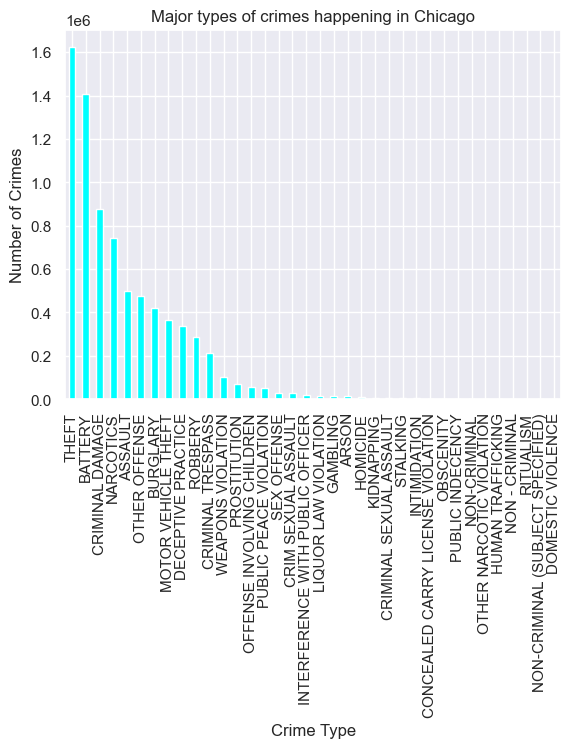

In [44]:
crime_by_type.plot(kind = 'bar', ylabel = 'Number of Crimes', xlabel = 'Crime Type', color = 'cyan', title='Major types of crimes happening in Chicago')

##### Most Prominent Crime Categories\ in Chicago

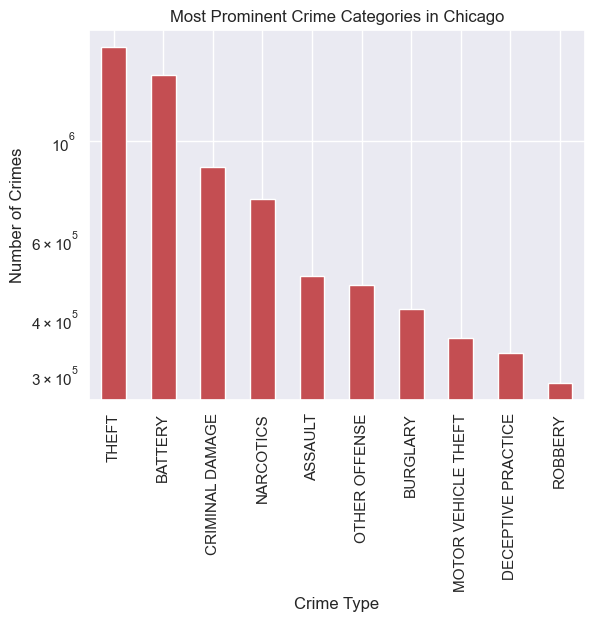

In [45]:
primary_top_df = df.groupby([df['Primary Type']]).size().sort_values(ascending=False).head(10).plot(kind='bar', ylabel = 'Number of Crimes', xlabel = 'Crime Type', color = 'r', logy=True, title = "Most Prominent Crime Categories in Chicago")


<div class="alert alert-block alert-info">
<b>From the Analysis of Primary Type Column </b>
The top 5 categories of crime are: THEFT, BATTERY, NARCOTICS, CRIMINAL DAMAGE, and ASSAULT.</div>



#### 2.  Analysis of Crime Description Column

In [46]:
crime_description = df['Description'].unique()
crime_description

array(['DOMESTIC BATTERY SIMPLE', 'POCKET-PICKING', 'OVER $500',
       'POSS: HEROIN(BRN/TAN)', 'SIMPLE', 'FORCIBLE ENTRY',
       'UNLAWFUL ENTRY', 'RETAIL THEFT', 'STRONGARM - NO WEAPON',
       'FINANCIAL IDENTITY THEFT OVER $ 300', '$500 AND UNDER',
       'TELEPHONE THREAT',
       'AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON', 'TO VEHICLE',
       'TO PROPERTY', 'ARMED: HANDGUN', 'FROM BUILDING',
       'AGGRAVATED: OTHER DANG WEAPON', 'HARASSMENT BY TELEPHONE',
       'OTHER VEHICLE OFFENSE', 'PAROLE VIOLATION',
       'POSS: CANNABIS 30GMS OR LESS', 'UNLAWFUL USE OTHER DANG WEAPON',
       'GUN OFFENDER: ANNUAL REGISTRATION',
       'POSS FIREARM/AMMO:NO FOID CARD', 'COUNTERFEIT CHECK',
       'MANU/DELIVER: HEROIN (WHITE)', 'UNLAWFUL POSS OTHER FIREARM',
       'UNLAWFUL USE HANDGUN', 'TO LAND', 'AUTOMOBILE',
       'HARASSMENT BY ELECTRONIC MEANS', 'FRAUD OR CONFIDENCE GAME',
       'POSS: CRACK', 'AGGRAVATED:KNIFE/CUTTING INSTR', 'ATTEMPT THEFT',
       'SOLICIT NARCOTIC

In [47]:
crime_descrp = df['Description'].value_counts()
crime_descrp

SIMPLE                                       903459
$500 AND UNDER                               624708
DOMESTIC BATTERY SIMPLE                      601762
TO VEHICLE                                   426744
OVER $500                                    407743
                                              ...  
AGGRAVATED POLICE OFFICER - OTHER FIREARM        11
SALE / DELIVER - DRUG PARAPHERNALIA              11
PATRONIZE JUVENILE PROSTITUTE                    10
ARSONIST - ANNUAL REGISTRATION                   10
EMPLOY MINOR                                     10
Name: Description, Length: 465, dtype: int64

In [48]:
top_crime_desc= df.groupby([df['Description']]).size().sort_values(ascending=False).head(10)
top_crime_desc

Description
SIMPLE                          903459
$500 AND UNDER                  624708
DOMESTIC BATTERY SIMPLE         601762
TO VEHICLE                      426744
OVER $500                       407743
TO PROPERTY                     405839
AUTOMOBILE                      289148
FORCIBLE ENTRY                  282597
POSS: CANNABIS 30GMS OR LESS    278135
FROM BUILDING                   252372
dtype: int64

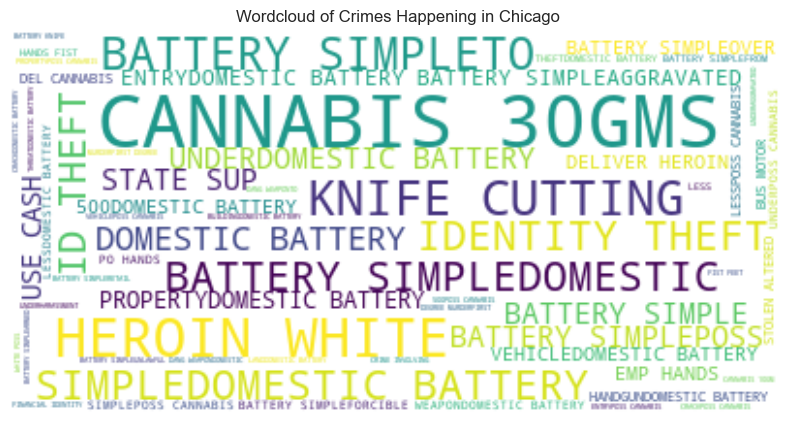

In [49]:
cr_des = "".join(crime for crime in df['Description'])
descrip_wordcloud = WordCloud(background_color="white").generate(cr_des)

plt.figure(figsize=[10,10])
plt.imshow(descrip_wordcloud, interpolation = 'bilinear')
plt.title('Wordcloud of Crimes Happening in Chicago')
plt.axis('off')

plt.show()

<div class="alert alert-block alert-info">
<b> From the analysis of Crime Description column</b>
    It was found that top 5 crimes occuring in Chicago are: SIMPLE, CAD 500 AND UNDER, DOMESTIC BATTERY SIMPLE, TO VEHICLE, OVER CAD 500. 
</div>



#### 3. Analysis of Location column, describing the points where crime occurs 

In [50]:
location = df['Location Description'].unique()
len(location)

160

In [51]:
crime_location = df['Location Description'].value_counts()
crime_location

STREET                      1999759
RESIDENCE                   1293757
APARTMENT                    861289
SIDEWALK                     725037
OTHER                        270027
                             ...   
BARBER SHOP/BEAUTY SALON         24
STAIRWELL                        22
DRIVEWAY                         20
OFFICE                           18
CLUB                             18
Name: Location Description, Length: 160, dtype: int64

<AxesSubplot: title={'center': 'Most Prominent locations of crimes'}, xlabel='Location of Crimes', ylabel='Number of Crimes'>

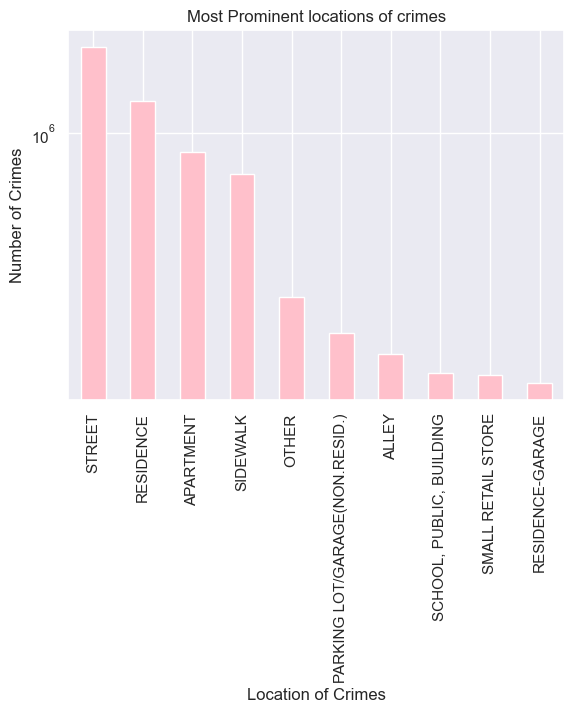

In [52]:
cr_lo_descrp = df['Location Description'].sort_values(ascending = True)
cld =cr_lo_descrp.value_counts()
cldd = cld.head(10)
cldd.plot(kind = 'bar', ylabel = 'Number of Crimes', xlabel = 'Location of Crimes', color = 'pink', logy=True ,title='Most Prominent locations of crimes')


<div class="alert alert-block alert-info">
<b> From the analysis of Location Description column</b>
    It was found that top 5 crime locations in Chicago are: STREET, RESIDENCE, APARTMENT, SIDEWALK, OTHER. 
</div>



#### .4 Analysis of Arrest Statistics in Chicago

<AxesSubplot: title={'center': 'Arrest Statistics'}, ylabel=' '>

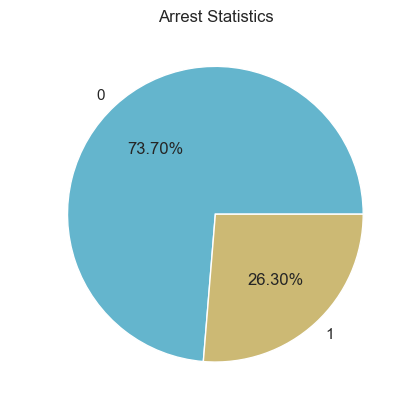

In [53]:
arrest_stats = df['Arrest'].value_counts()
df.groupby('Arrest').size().plot(kind = 'pie', ylabel=" " , title = 'Arrest Statistics', autopct = "%.2f%%", colors = 'cyan')

<div class="alert alert-block alert-info">
<b> From the analysis of Arrest column</b>
    It was found that only <b>one-third</b> of the people who commit crime got arrested by the police. 
</div>



#### Chicago's Crime by Location

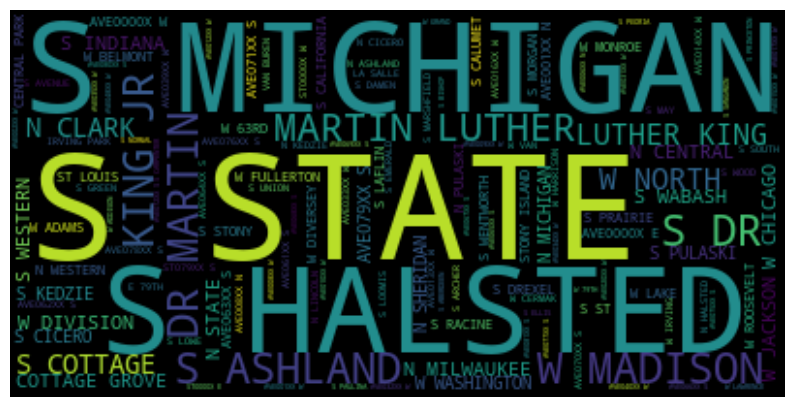

In [54]:
cr_loc = "".join(crime for crime in df['Block'])
descrip_wordcloud = WordCloud().generate(cr_loc)

plt.figure(figsize=[10,10])
plt.imshow(descrip_wordcloud, interpolation = 'bilinear')
plt.axis('off')

plt.show()

<div class="alert alert-block alert-info">
This wordcloud is able to quickly tells us which avenues to avoid in Chicago due to the higher frequency of crime occurrence. The most prominent crime locations are - <b>Michigan Ave, Halsted St, Ashland Ave, State St, Madison St, Pulaski Rd, Luther King, Martin Luther, Western Ave</b></div>



#### Yearly Crime Trend Analysis

Text(0, 0.5, 'Incident frequency')

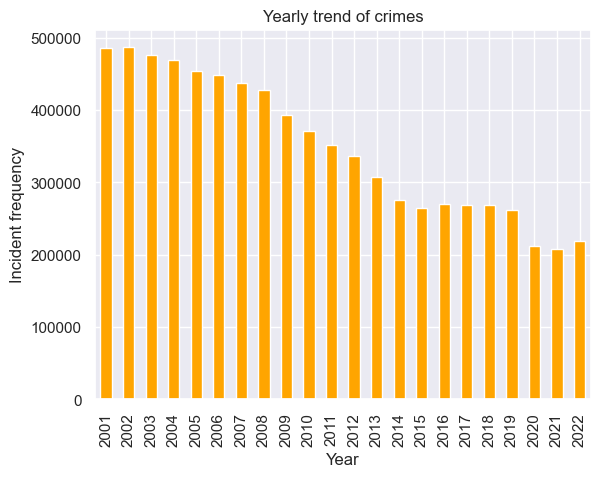

In [55]:
df['Date'] = pd.to_datetime(df['Date'])

updated_df = df.set_index("Date")
updated_df = updated_df.sort_index()
updated_df.index

ax = updated_df.groupby(by = [updated_df.index.year], axis = 0)['Primary Type'].count().plot(kind = "bar", color = 'orange')

# Set y-axis values
ax.set_ylim(auto=True)

# Set graph title
ax.set_title(label = "Yearly trend of crimes")

# Set axis proper labels
ax.set_xlabel(xlabel = "Year") 
ax.set_ylabel(ylabel = "Incident frequency") 



<div class="alert alert-block alert-info">
From the trend above, we can see that the frequency of crimes in Chicago is <b>decreasing</b> over the years. </div>

#### Detailed analysis of each category of crime over the years

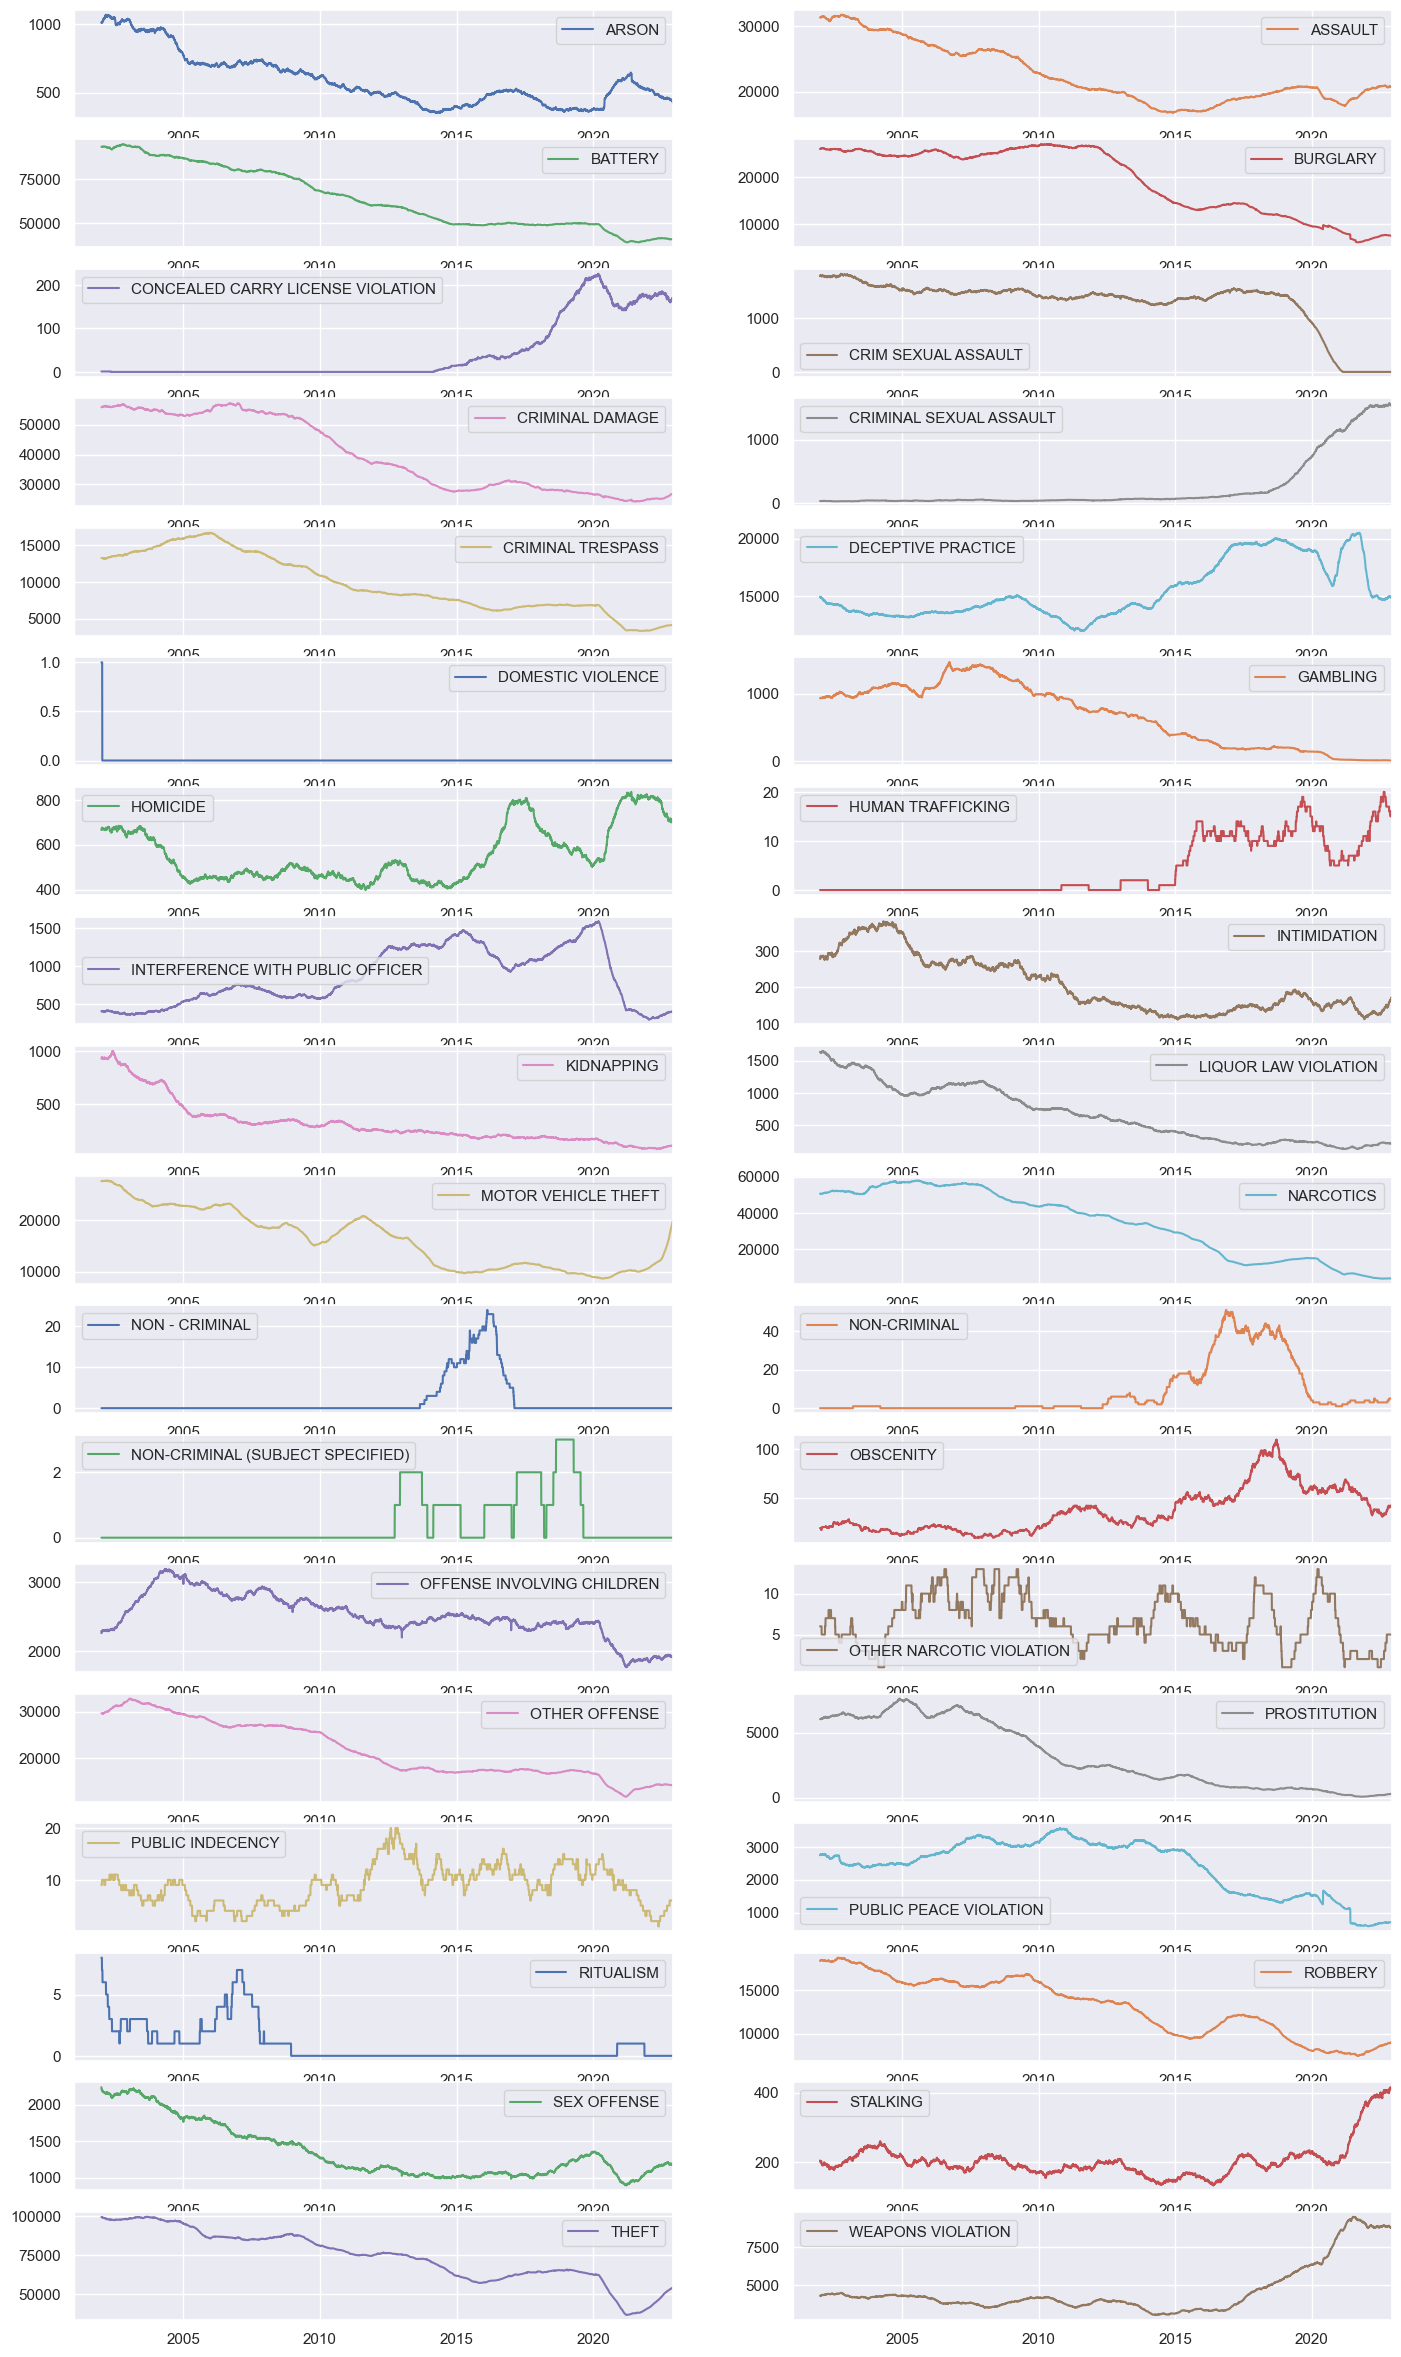

In [56]:
crime_count_date = updated_df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=updated_df.index.date, fill_value=0)
crime_count_date.index = pd.DatetimeIndex(crime_count_date.index)
plot = crime_count_date.rolling(365).sum().plot(figsize=(17,30),subplots=True,layout=(-1,2),sharex=False, sharey=False)


<div class="alert alert-block alert-info">
Although overall crime rate is decreasing. However, on the detailed analysis I found that in some categories it is increasing. Listing the crime categories which are increasing over time.<l1>
    
1. THEFT
2. WEAPONS VOILATION
3. STAlKING
4. MOTOR VEHICLE THEFT
5. CRIMINAL SEXUAL ASSAULT
6. HUMAN TRAFFICKING
7. HOMICIDE
8. ARSON 
9. CONCEALED CARRY
    </l1>
    
</div>


#### Monthly Crime Trend Analysis

Text(0, 0.5, 'Incident frequency')

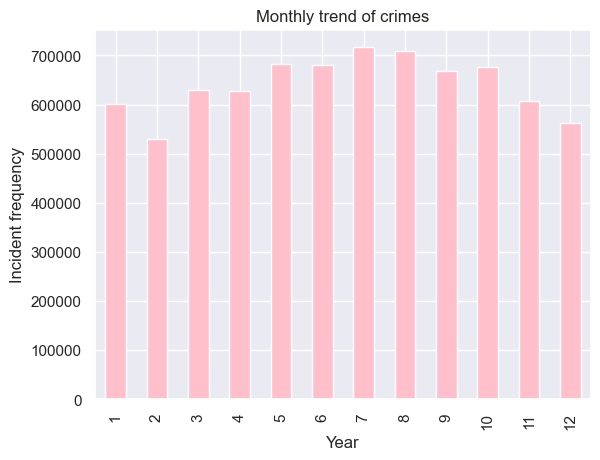

In [57]:
df['Date'] = pd.to_datetime(df['Date'])

updated_df = df.set_index("Date")
updated_df = updated_df.sort_index()
updated_df.index

ax = updated_df.groupby(by = [updated_df.index.month], axis = 0)['Primary Type'].count().plot(kind = "bar", color = 'pink')

# Set y-axis values
ax.set_ylim(auto=True)

# Set graph title
ax.set_title(label = "Monthly trend of crimes")

# Set axis proper labels
ax.set_xlabel(xlabel = "Year") 
ax.set_ylabel(ylabel = "Incident frequency") 



<div class="alert alert-block alert-info">
    There cannot be any such insight from overall monthly crime category analysis. However, we can further bread down year on the month basis to check more useful insights.  
    </div>

#### Arrest with the crimes happening

Proportion of Non Arrested [0] vs Arrested [1] :
0    0.737028
1    0.262972
Name: Arrest, dtype: float64


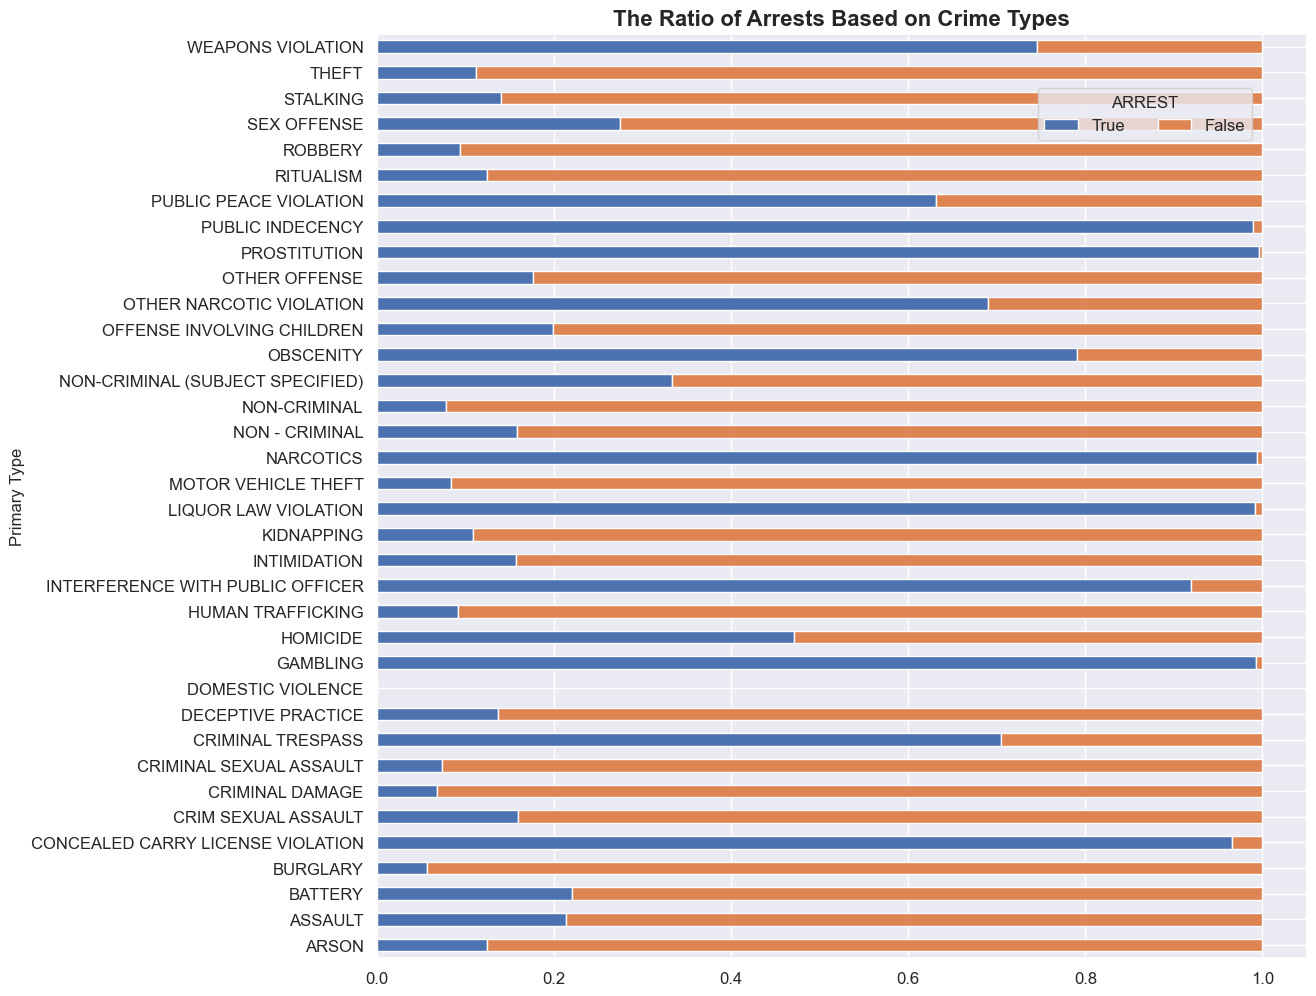

In [58]:
df_by_arrest = updated_df.copy()

print(f'Proportion of Non Arrested [0] vs Arrested [1] :')
print(df['Arrest'].value_counts(normalize = True))


#Group by crime primary type and arrest
df_by_arrest = df_by_arrest.groupby(['Primary Type', 'Arrest']).size().reset_index(name='No. of Crimes')

#Create pivot table 

pivot_by_arrest = pd.pivot_table(df_by_arrest, index=['Primary Type'], columns = ['Arrest'], values= 'No. of Crimes', aggfunc=np.sum)

pivot_by_arrest = pivot_by_arrest.reset_index()

#Create new columns in pivot table - 'Total No.', 'True', 'False'
pivot_by_arrest['Total No.']=pivot_by_arrest[True] + pivot_by_arrest[False]
pivot_by_arrest['True']=pivot_by_arrest[True]/ pivot_by_arrest['Total No.']
pivot_by_arrest['False']=pivot_by_arrest[False]/ pivot_by_arrest['Total No.']
pivot_by_arrest = pivot_by_arrest[['Primary Type','True','False']]
pivot_by_arrest = pivot_by_arrest.set_index('Primary Type')

#Plot stacked bar chart of Arrest success for the top 10 crimes
pivot_by_arrest.plot(kind='barh', stacked=True, figsize = (12, 12))
plt.title('The Ratio of Arrests Based on Crime Types',fontsize=16,fontweight='bold')
plt.ylabel('Primary Type')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.95, 0.95), ncol=2, title = 'ARREST')


<div class="alert alert-block alert-info">
From the analysis of Primary Crime Type and Arrest - It can be concluded that for the most prominent crimes which are THEFT, BATTERY,CRIMINAL DAMAGE, and ASSAULT, the proportion of arrest with respect to crime is very less. However, one exception is there for NARCOTICS, where its proportion is quite high.</div>


#### Comparing the Categories of Crimes with those where Arrest is highest.

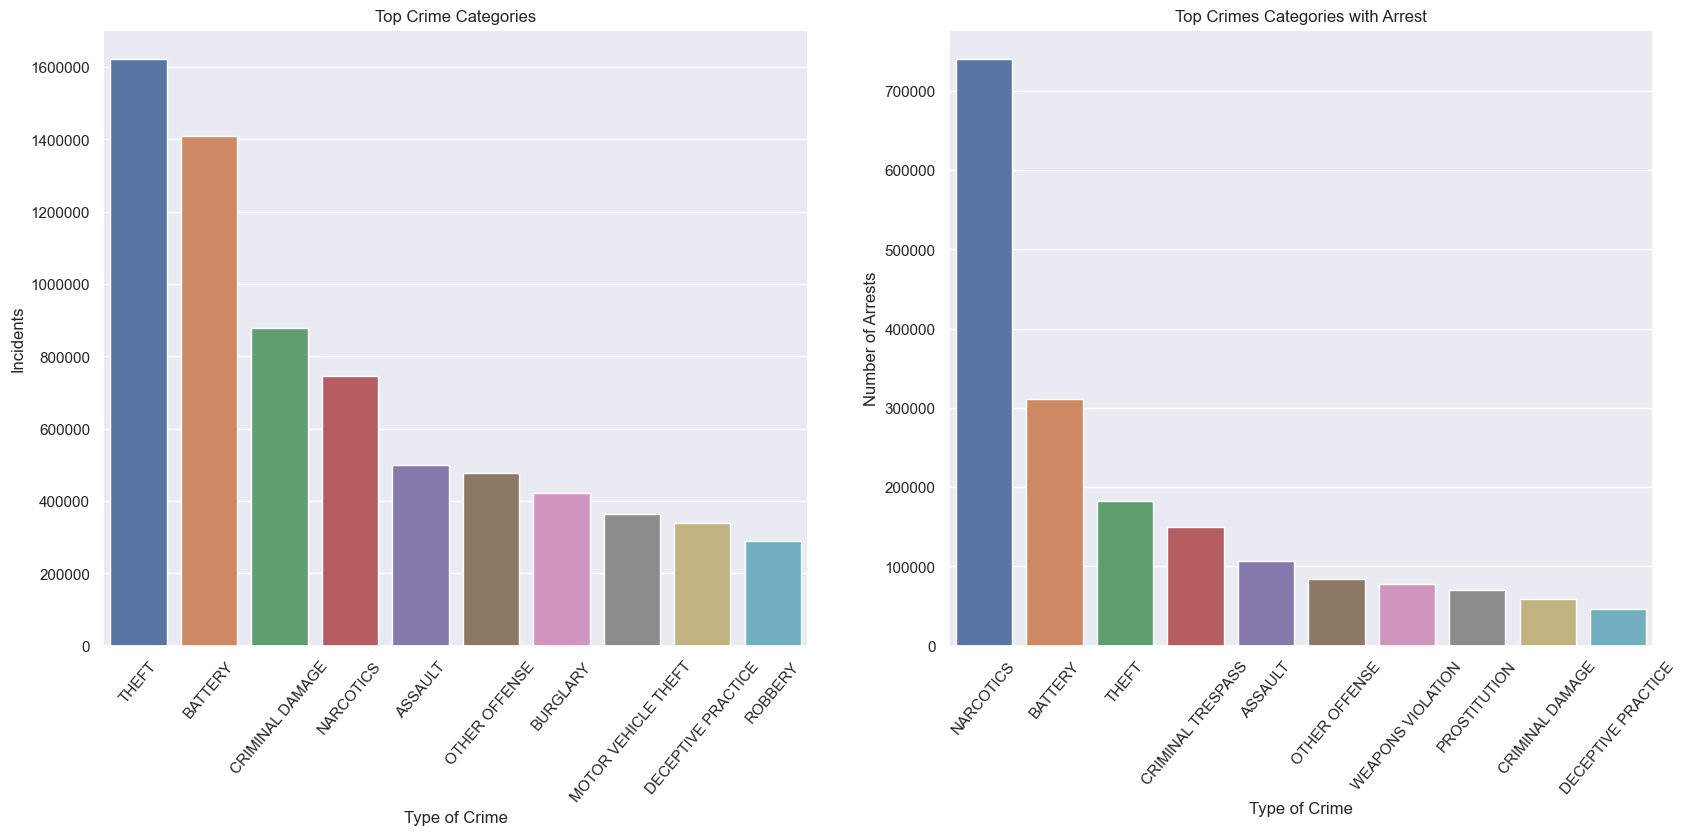

In [59]:
MostFrequent_Crimes = df.groupby(['Primary Type'])['Arrest'].count().sort_values(ascending=False).head(10)
Top10_Arrest = df.groupby(['Primary Type'])['Arrest'].sum().sort_values(ascending=False).head(10)

f = plt.figure(figsize=(20,8))
gs = f.add_gridspec(1,2)

ax1 = f.add_subplot(gs[0,0])
sns.barplot(x=MostFrequent_Crimes.index, y=MostFrequent_Crimes.values, ax=ax1)
ax1.ticklabel_format(style='plain', axis='y')
ax1.tick_params(axis='x', rotation=50)
ax1.set_title('Top Crime Categories')
ax1.set_ylabel('Incidents')
ax1.set_xlabel('Type of Crime')

ax2 = f.add_subplot(gs[0,1])
sns.barplot(x=Top10_Arrest.index, y=Top10_Arrest.values, ax=ax2 )
ax2.ticklabel_format(style='plain', axis='y')
ax2.tick_params(axis='x', rotation=50)
ax2.set_title('Top Crimes Categories with Arrest')
ax2.set_ylabel('Number of Arrests')
ax2.set_xlabel('Type of Crime')


plt.show()

<div class="alert alert-block alert-info">
On comparing list of top crime categories and arrest, it can be concluded that it is <b>not equivalent</b>. Evidently, the crime rate under THEFT is the highest one, but the percentage of arrest is higher in NARCOTICS.</div>


### Recent Trends in Crimes happening in Chicago

#### 1. Monthly Crime Trends 

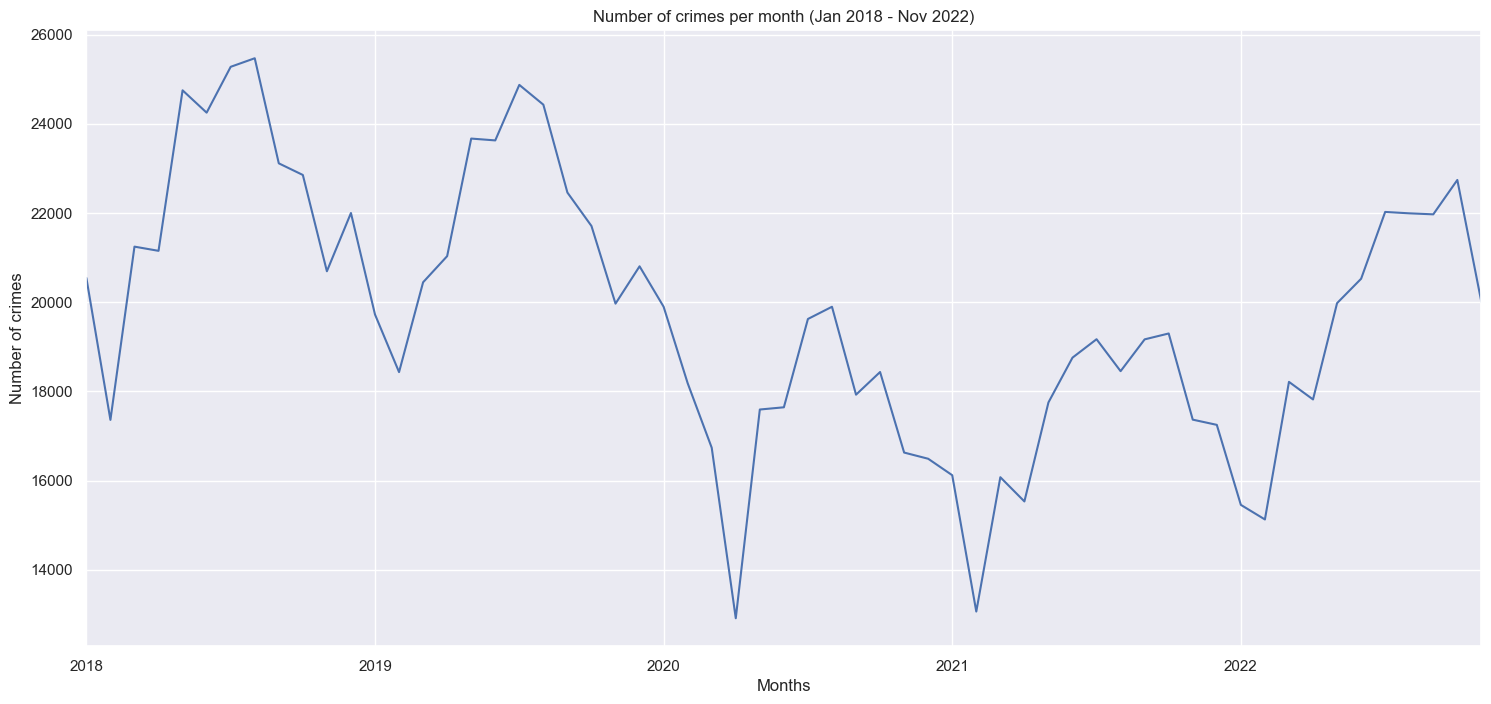

In [60]:
half_year_locator = mdates.MonthLocator(interval=6)
updated_df.loc['2018-01-01':'2022-11-30'].resample('M').size().plot(legend=False,figsize=(18,8))
plt.title('Number of crimes per month (Jan 2018 - Nov 2022)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

<div class="alert alert-block alert-info">
    On analyzing the recent 4 years trends, it has been found that the frequency of crimes in Chicago is decreasing, with seasonal peaks between <b>June to August</b>, and drops between <b>January to March</b>.</div>

#### 2. Distribution of categories of crimes over the year

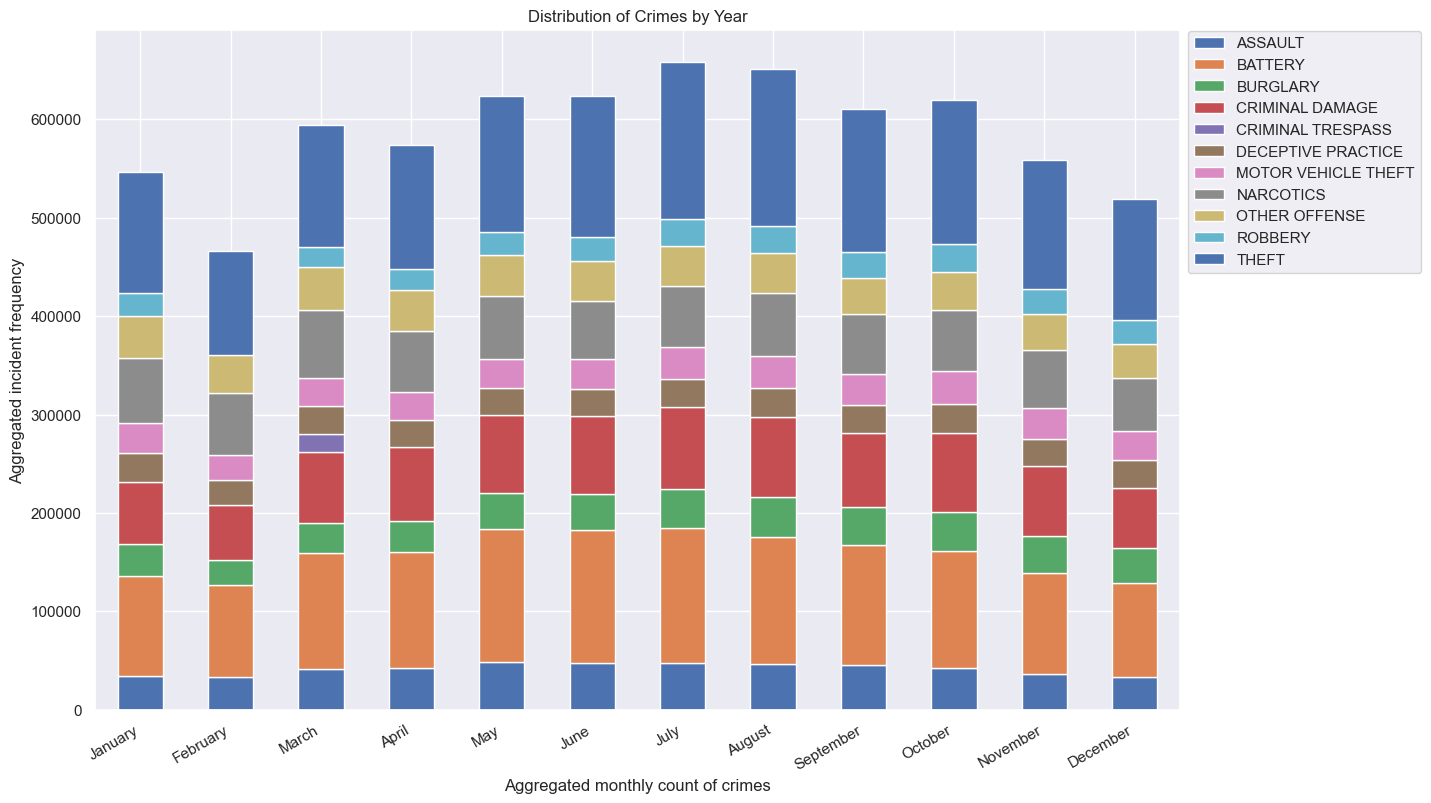

In [61]:
num_primary_types = 10
num_months = 12

# Group the data by month
crimes_gb_mpt = updated_df.groupby(by = [updated_df.index.month, "Primary Type"], axis = 0)

# Count the number of incidents of our grouped set
crimes_gb_mpt_pt_count = crimes_gb_mpt["Primary Type"].count()

# Chosing to display only some of the crime class, for readability
if num_primary_types != None:
    crimes_gb_mpt_pt_count = crimes_gb_mpt_pt_count.nlargest(num_primary_types * num_months)
    crimes_gb_mpt_pt_count_un = crimes_gb_mpt_pt_count.unstack()

# Plot the data

months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}


ax = crimes_gb_mpt_pt_count_un.plot(kind = "bar", stacked = True, figsize = (14, 10), use_index = False, legend = True)

# Set y-axis values
ax.set_ylim(auto=True)

# Set graph title
ax.set_title(label = "Distribution of Crimes by Year")

# Set axis proper labels
ax.set_xlabel(xlabel = "Aggregated monthly count of crimes")
ax.set_ylabel(ylabel = "Aggregated incident frequency") 
# Set x-axis ticks and corresponding labels to be the index of our series object
ax.set_xticks(ticks = crimes_gb_mpt_pt_count.index.levels[0] - 1);
ax.set_xticklabels(labels = [months[x] for x in crimes_gb_mpt_pt_count.index.levels[0]])

# Auto-format year labels
ax.get_figure().autofmt_xdate();

ax.legend(bbox_to_anchor = (1, 1.01));

<div class="alert alert-block alert-info">
    From the above output, it is evident that there is no major variation in the categories of the crime throughout the year. </div>

### Time-series trends using Heatmaps

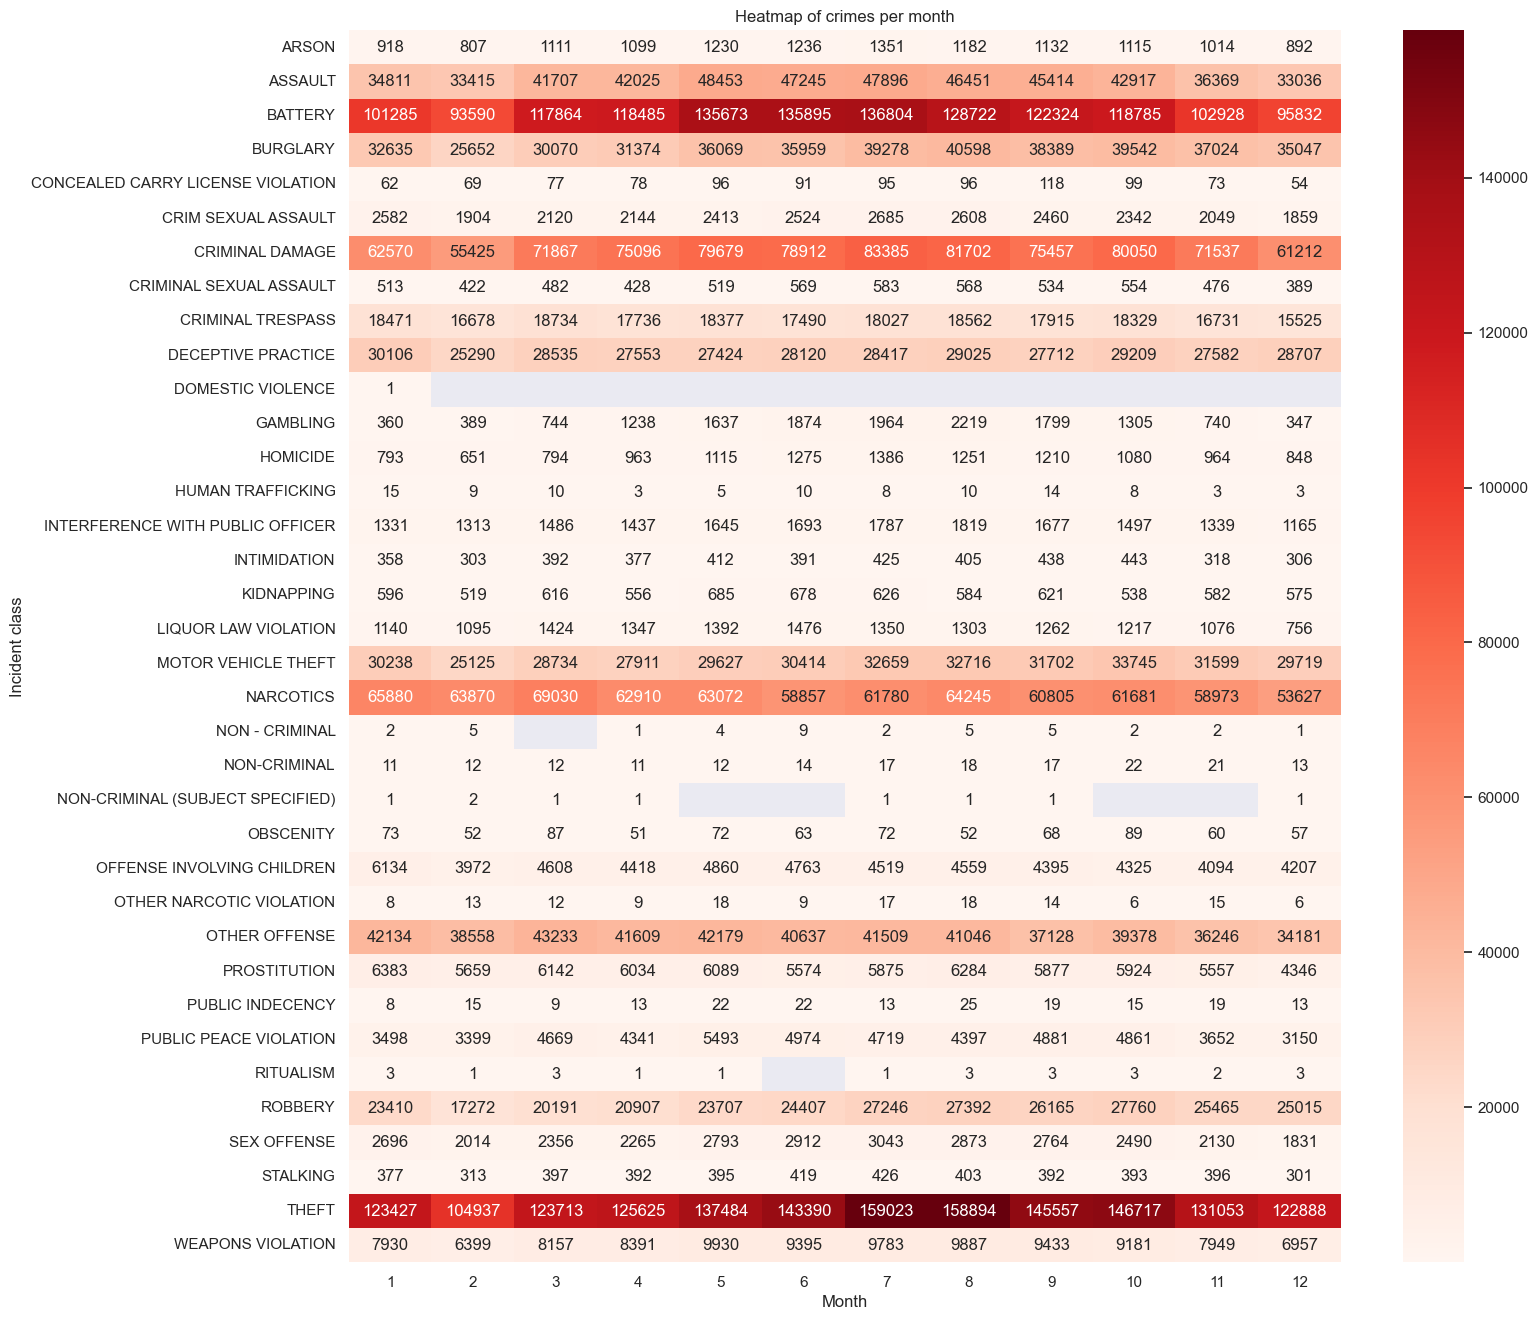

In [64]:
# Group our data by month
crimes_gb_mpt = updated_df.groupby(by = ["Primary Type", updated_df.index.month], axis = 0)

# Count the number of incidents of our grouped set
crimes_gb_mpt_count = crimes_gb_mpt["Primary Type"].count()

crimes_gb_mpt_count_un = crimes_gb_mpt_count.unstack()


fig, ax = plt.subplots(figsize = (16, 16))
sns.heatmap(data = crimes_gb_mpt_count_un, annot = True, fmt = ".0f", linewidths = .0, center = crimes_gb_mpt_count.max() / 2, cmap = "Reds", ax = ax)

# Set graph title
ax.set_title(label = "Heatmap of crimes per month")

# Set axis proper labels
ax.set_xlabel(xlabel = "Month")
ax.set_ylabel("Incident class");

<div class="alert alert-block alert-info">
    Heatmaps is giving evidences to all the presvious observations. Firstly, the most dark red regions display the most prominent crime categories of Chicago. Morover, a change in the color is observable during the middle months of the year, which are July and Auguest. Thus, we are found that the number of crimes occur mostly in July and August.
    </div>

#### Weekly analysis of Crime

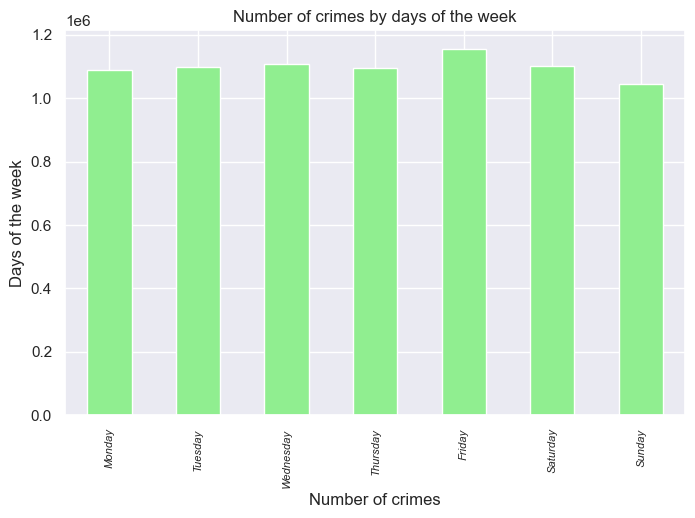

In [65]:
plt.figure(figsize=(8, 5))
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
updated_df.groupby([updated_df.index.dayofweek]).size().plot(kind='bar', color= 'lightgreen')
plt.ylabel('Days of the week')
plt.xticks(np.arange(7), days, fontsize=8)
plt.xticks(style='oblique', fontsize=8)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by days of the week')
plt.show()


<div class="alert alert-block alert-info">
    There no such evidences related to crime in weekly analysis.
</div>

#### Analyzing days of week with the categories of the crime

In [66]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

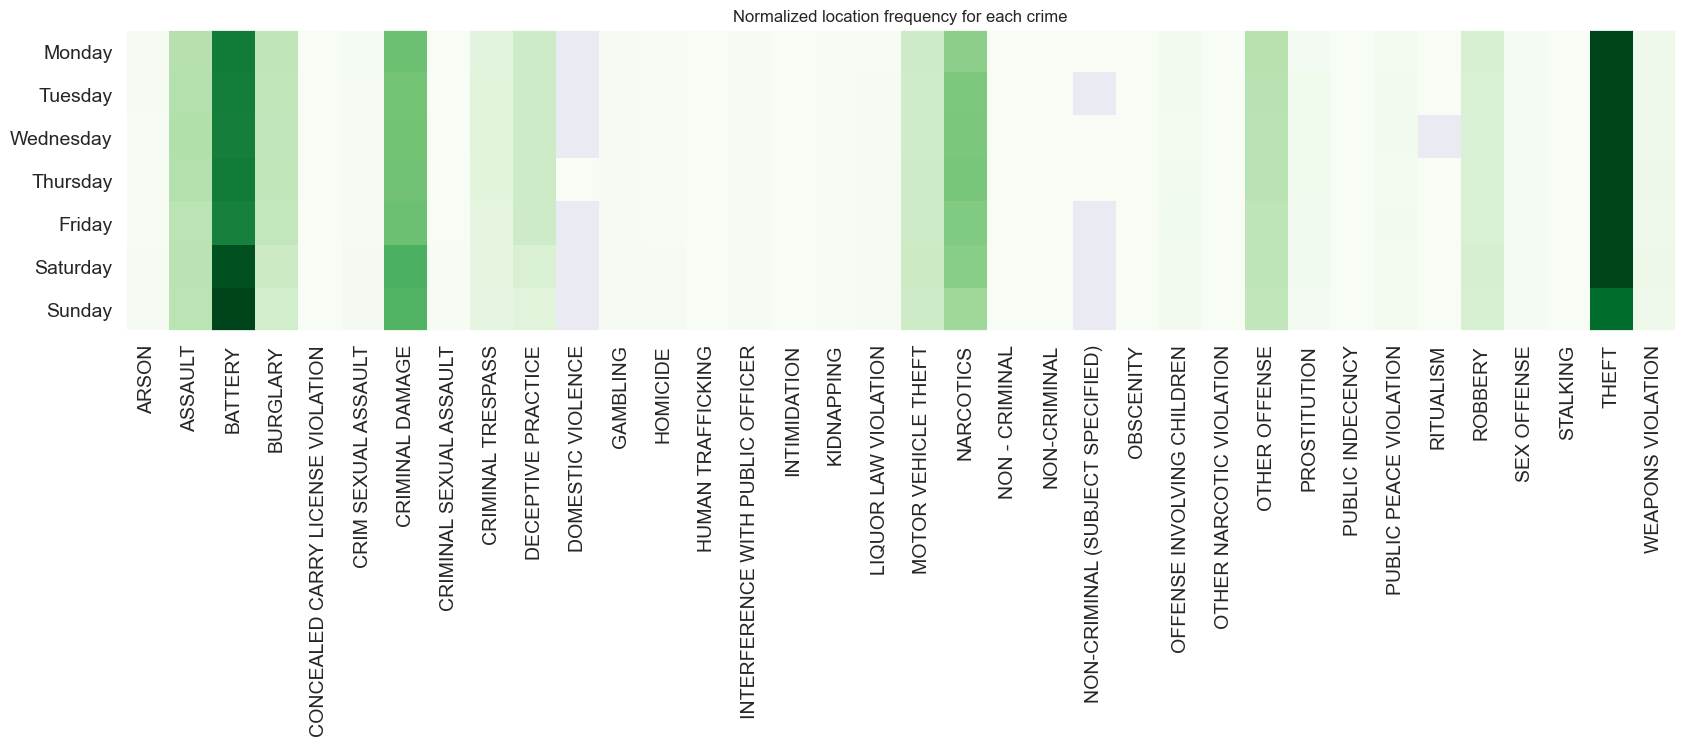

In [67]:
dayofweek_by_type = updated_df.pivot_table(values='ID', index='Primary Type', columns=updated_df.index.dayofweek, aggfunc=np.size)
df_norm = normalize(dayofweek_by_type)
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(20,7))
plt.imshow(df_norm.T, cmap='Greens')

plt.xticks(np.arange(df_norm.shape[0]), df_norm.index, rotation='vertical', fontsize=14)
plt.yticks(np.arange(df_norm.shape[1]), days, fontsize=14)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

<div class="alert alert-block alert-info">
As shown, BATTERY crime and CRIMINAL DAMAGE happens mostly on Saturday and Sunday in comparison to other days of the week. While during the weekdays mostly BURGLARY, DECEPTIVE PRACTICE is intensive. NARCOTICS and THEFT crimes are less frequent on Sunday. The rest types of crimes look distributed similarly during all days of the week. </div>



#### Hourly analysis of crime in Chicago

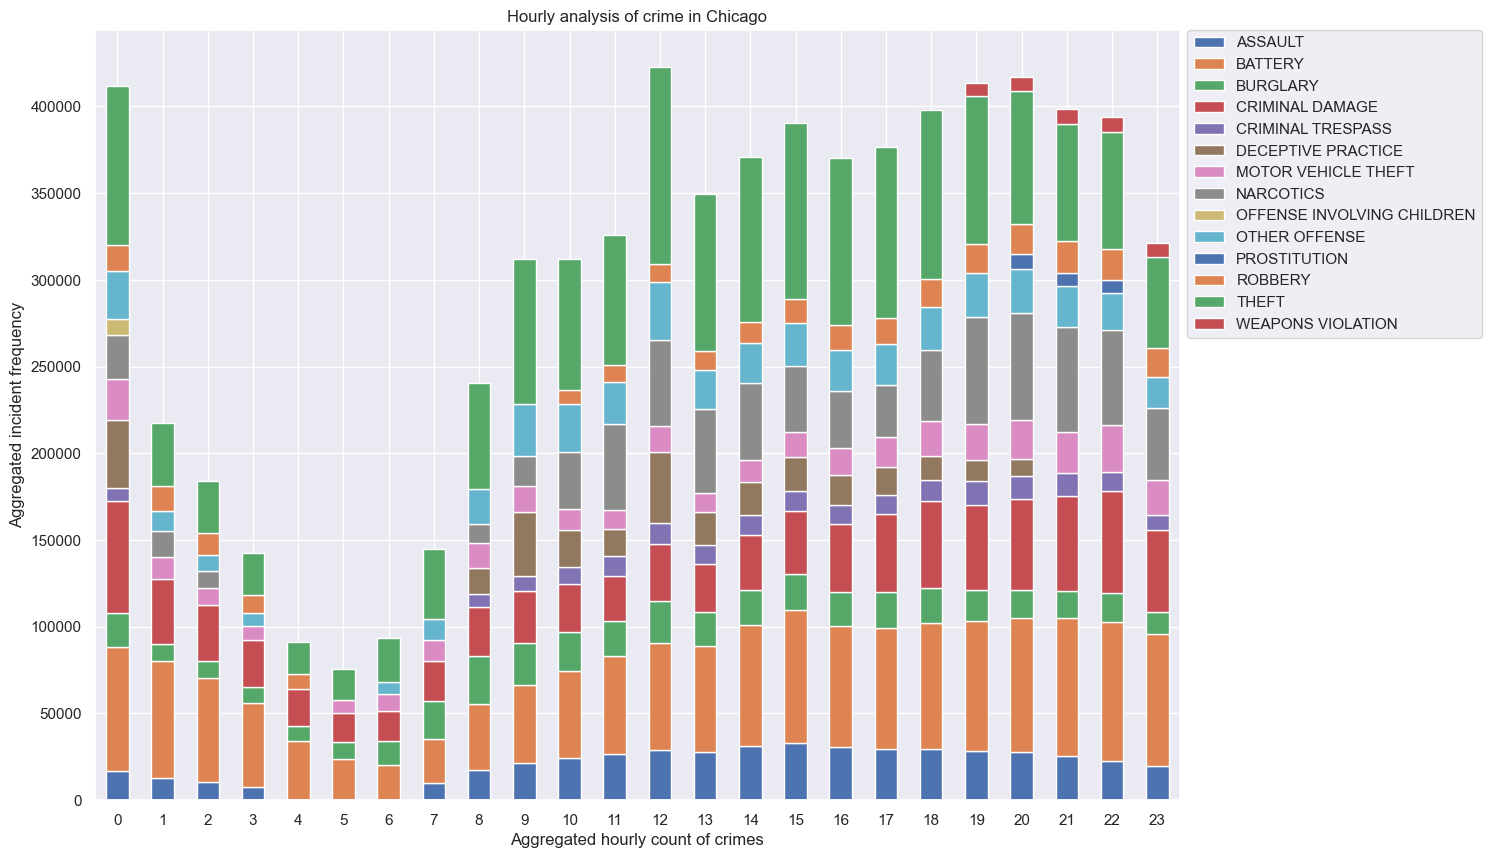

In [68]:
num_primary_types = 10
num_hours = 24

# Group our data by hour
crimes_gb_hpt = updated_df.groupby(by = [updated_df.index.hour, "Primary Type"], axis = 0)

# Count the number of incidents of our grouped set
crimes_gb_hpt_pt_count = crimes_gb_hpt["Primary Type"].count()

# We may chose to display only some of the crime class, for readability
if num_primary_types != None:
    crimes_gb_hpt_pt_count = crimes_gb_hpt_pt_count.nlargest(num_primary_types * num_hours)
    
crimes_gb_hpt_pt_count_un = crimes_gb_hpt_pt_count.unstack()

ax = crimes_gb_hpt_pt_count_un.plot(kind = "bar", stacked = True, figsize = (14, 10), use_index = False, legend = True)

ax.set_ylim(auto=True)

ax.set_title(label = "Hourly analysis of crime in Chicago")

ax.set_xlabel(xlabel = "Aggregated hourly count of crimes")
ax.set_ylabel(ylabel = "Aggregated incident frequency")

for tick in ax.get_xticklabels():
    tick.set_rotation(0)

ax.legend(bbox_to_anchor = (1, 1.01));


<div class="alert alert-block alert-info">
The analysis of hours states that the safe hours are between 01:00 am and 08:00 am. This trend follows the same pattern for all crime classes.</div>

#### Analyzing top 5 Crime Types over the time of the day

In [69]:
def explore_crime(c):
    primary_crime = df[df['Primary Type']== c ]
    primary_hour = primary_crime.groupby('HourofCrime')['HourofCrime'].count()

    f = plt.figure(figsize=(6,3))
    gs = f.add_gridspec(1,1)
    
    ax = f.add_subplot(gs[0,0])
    sns.barplot(x=primary_hour.index ,y= primary_hour.values, ax=ax)
    ax.ticklabel_format(style='plain', axis='y')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title('{} Incidents by Hour of Day'.format(c.title()))
    ax.set_ylabel('Incidents')
    ax.set_xlabel('Hour of Crime')
    
    
    plt.show()
    


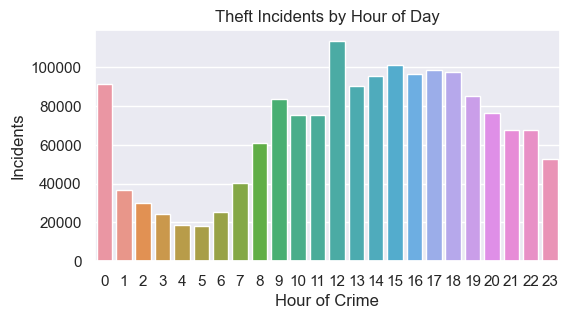

In [70]:
explore_crime('THEFT')

<div class="alert alert-block alert-info">
THEFT ususally occurs in the day time, that said, usually people leave their homes for work or any other activity that leads to theft.
</div>

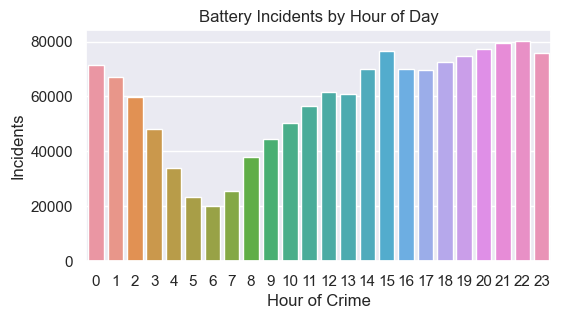

In [71]:
explore_crime('BATTERY')

<div class="alert alert-block alert-info">
BATTERY crime happens usually in the eveing after 2 PM till midnight. Then, it tends to decrease.
</div>

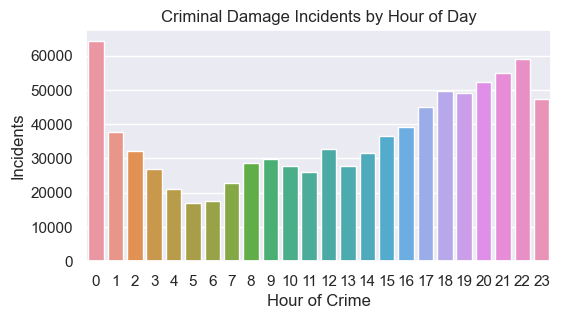

In [72]:
explore_crime('CRIMINAL DAMAGE')

<div class="alert alert-block alert-info">
CRIMINAL DAMAGE usually repoted at midnight in comaprison to other hours of the day.
</div>

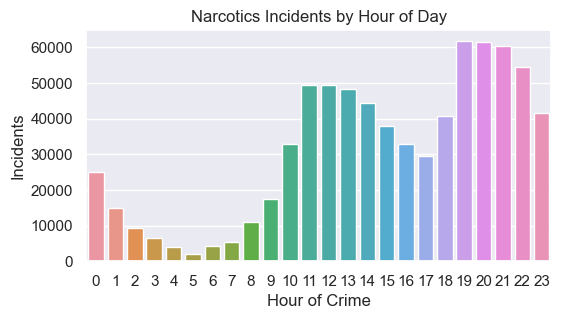

In [73]:
explore_crime('NARCOTICS')

<div class="alert alert-block alert-info">
NARCOTICS has been reported during the night hours from 7 PM to 11 PM.
</div>

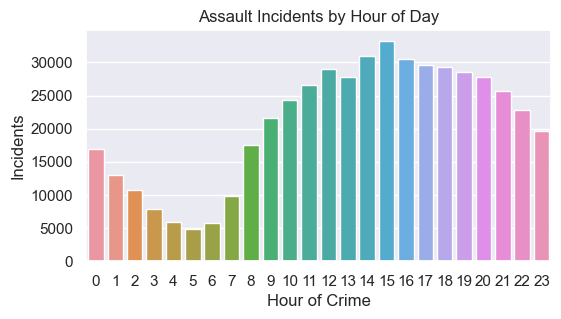

In [74]:
explore_crime('ASSAULT')

<div class="alert alert-block alert-info">
Mostly Assault is reported during the day hours, this means people are not safe in day hours in comparison to night hours. The police must increase their protection during the day to prevent Assault happenings with the people.
</div>

#### Top 10 crimes in the day vs top 10 crimes at night

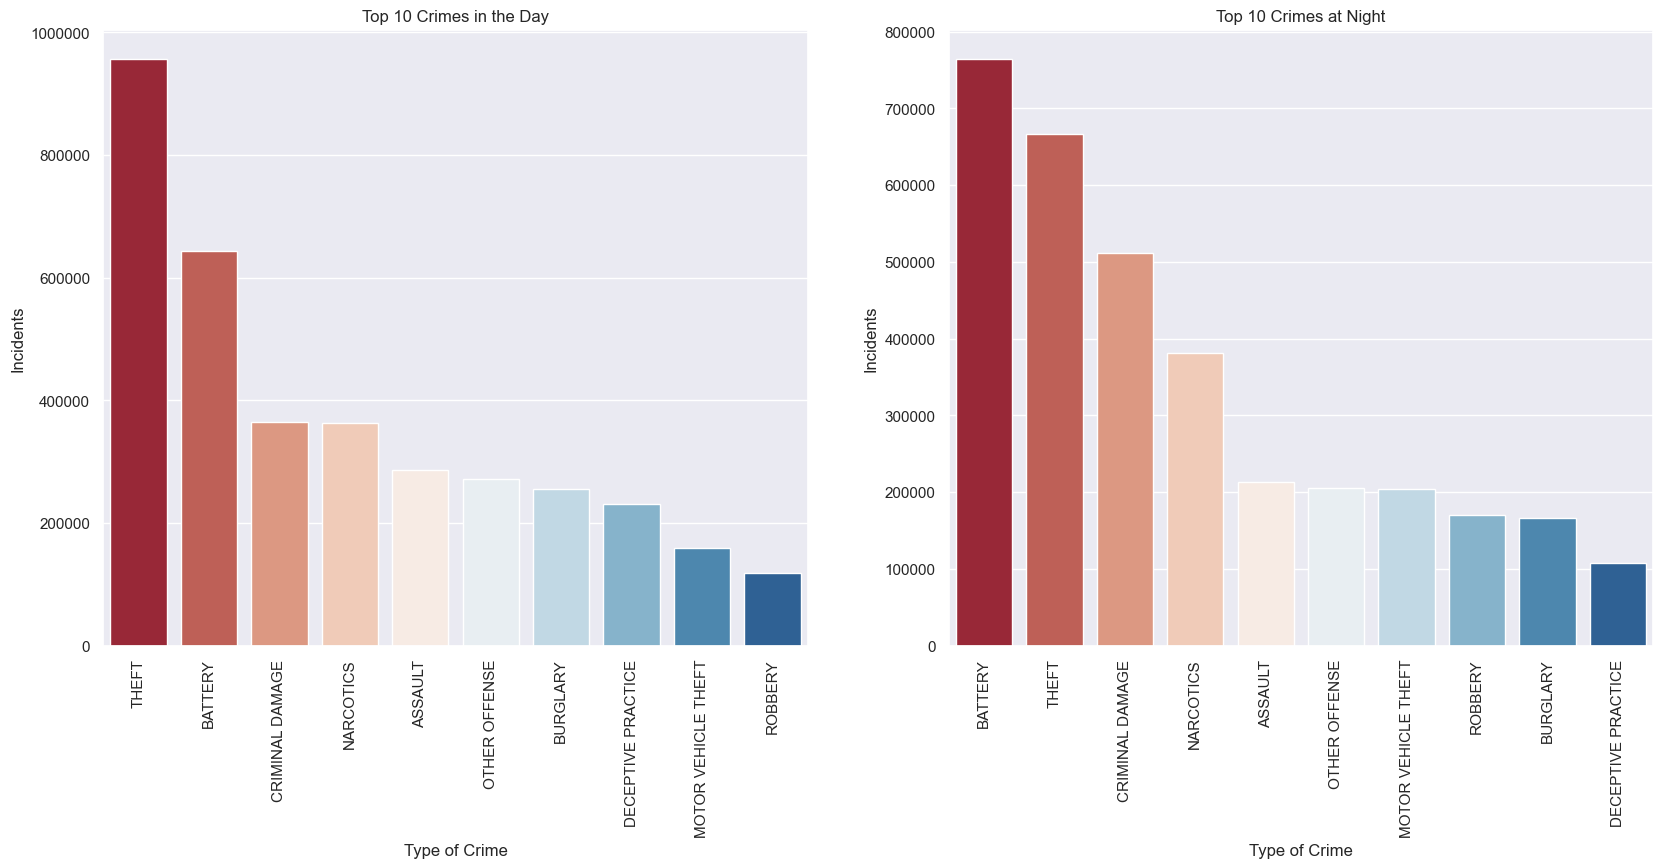

In [75]:
    DayCrime = df[df['DayorNight']=='Day Time'].groupby('Primary Type')['Primary Type'].count().sort_values(ascending=False).head(10)
    NightCrime = df[df['DayorNight']=='Night Time'].groupby('Primary Type')['Primary Type'].count().sort_values(ascending=False).head(10)

    f = plt.figure(figsize=(20,8))
    gs = f.add_gridspec(1,2)

    ax3 = f.add_subplot(gs[0,0])
    sns.barplot(x=DayCrime.index ,y= DayCrime.values, palette="RdBu", ax=ax3)
    ax3.ticklabel_format(style='plain', axis='y')
    ax3.tick_params(axis='x', rotation=90)
    ax3.set_title('Top 10 Crimes in the Day')
    ax3.set_ylabel('Incidents')
    ax3.set_xlabel('Type of Crime')

    ax4 = f.add_subplot(gs[0,1])
    sns.barplot(x=NightCrime.index ,y= NightCrime.values, palette="RdBu", ax=ax4)
    ax4.ticklabel_format(style='plain', axis='y')
    ax4.tick_params(axis='x', rotation=90)
    ax4.set_title('Top 10 Crimes at Night')
    ax4.set_ylabel('Incidents')
    ax4.set_xlabel('Type of Crime')
    plt.show()

## Location Trend Analysis

#### Number of crimes by location

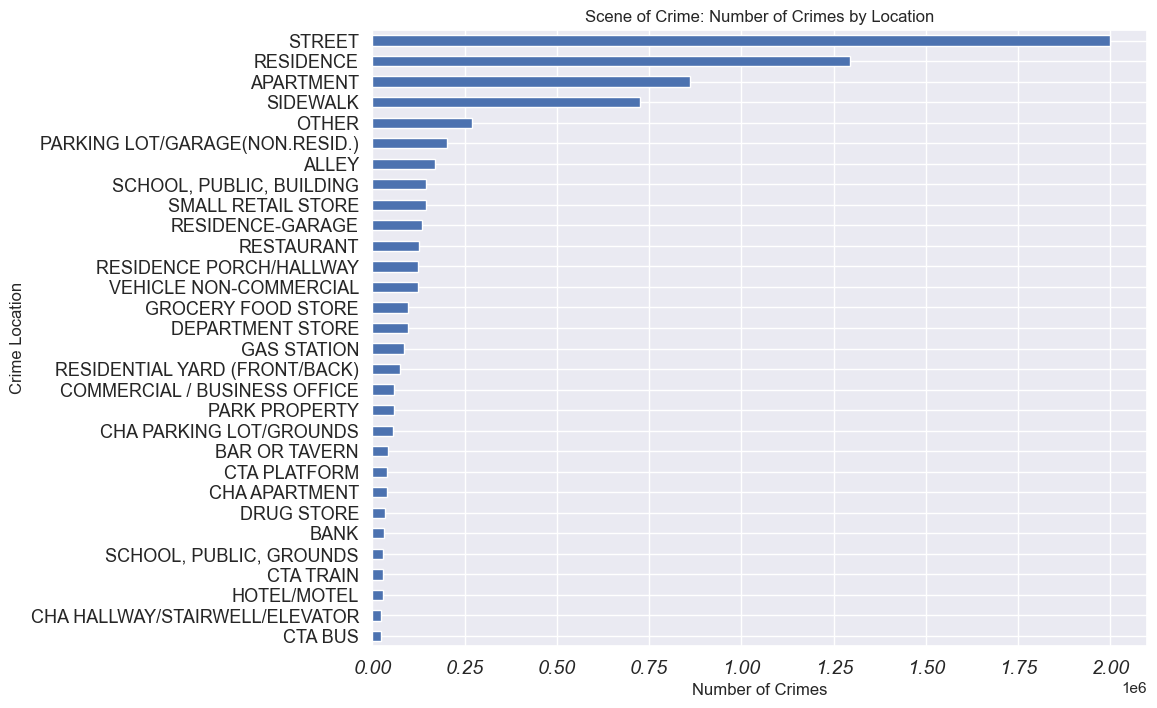

The most frequent 16 locations of criminal activity are: ['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER', 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SCHOOL, PUBLIC, BUILDING', 'SMALL RETAIL STORE', 'RESIDENCE-GARAGE', 'RESTAURANT', 'RESIDENCE PORCH/HALLWAY', 'VEHICLE NON-COMMERCIAL', 'GROCERY FOOD STORE', 'DEPARTMENT STORE', 'GAS STATION']


In [78]:
crimes_by_loc= updated_df.groupby('Location Description').size().sort_values(ascending=True).tail(30)

plt.figure(figsize=(10, 8))
crimes_by_loc.plot(kind='barh')

plt.title('Scene of Crime: Number of Crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of Crimes')
plt.yticks(fontsize=13)
plt.xticks(style='oblique', fontsize=14)

plt.show()

crimes_by_loc_top = updated_df.groupby([updated_df['Location Description']]).size().sort_values(ascending=False).nlargest(16)

print(f"The most frequent 16 locations of criminal activity are: {list(crimes_by_loc_top.index)}")   
   



###### Crimes by Police Districts 



<Figure size 800x1200 with 0 Axes>

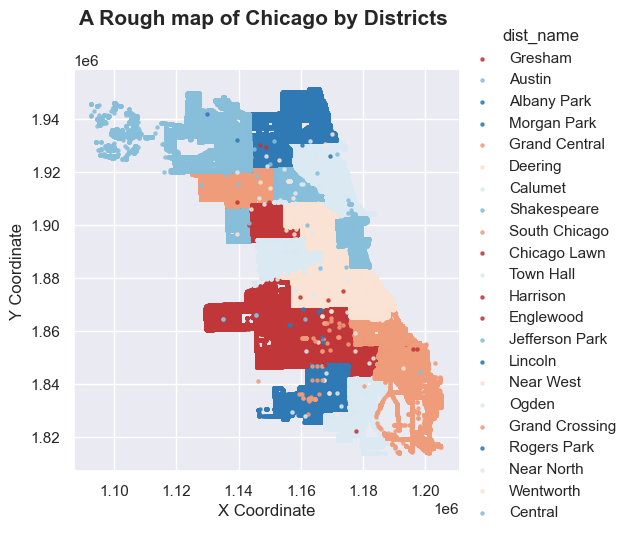

In [79]:
df_dist = updated_df[(updated_df["X Coordinate"] != 0) & (updated_df["Y Coordinate"] != 0)]
palette = {"Chicago Lawn":'#c13639',
           "Harrison":'#c13639', 
           "Gresham":'#c13639',
           'Englewood':'#c13639',
           'Grand Central':'#f09c7b',
           'South Chicago':'#f09c7b',
           'Grand Crossing':'#f09c7b',
           'Near West':'#fbe3d4',
           'Deering':'#fbe3d4',
           'Wentworth':'#fbe3d4',
           'Town Hall':'#dbeaf2',
           'Near North':'#dbeaf2',
           'Calumet':'#dbeaf2',
           'Ogden':'#dbeaf2',
           'Austin':'#87beda',
           'Central':'#87beda',
           'Shakespeare':'#87beda',
           'Jefferson Park':'#87beda',
           'Morgan Park':'#2f79b5',
           'Rogers Park':'#2f79b5',
           'Albany Park':'#2f79b5',
           'Lincoln':'#2f79b5'}
           
plt.figure(figsize=(8, 12))
# Simulate the map of Chicago with the help of X and Y co-ordinates
sns.lmplot(data= df_dist, x = 'X Coordinate', y ='Y Coordinate', fit_reg=False, hue="dist_name", palette=palette,height=5, scatter_kws={"marker": "+", "s": 5})

ax = plt.gca()
ax.set_title("A Rough map of Chicago by Districts \n", fontdict={'fontsize': 15}, weight="bold")
plt.show()

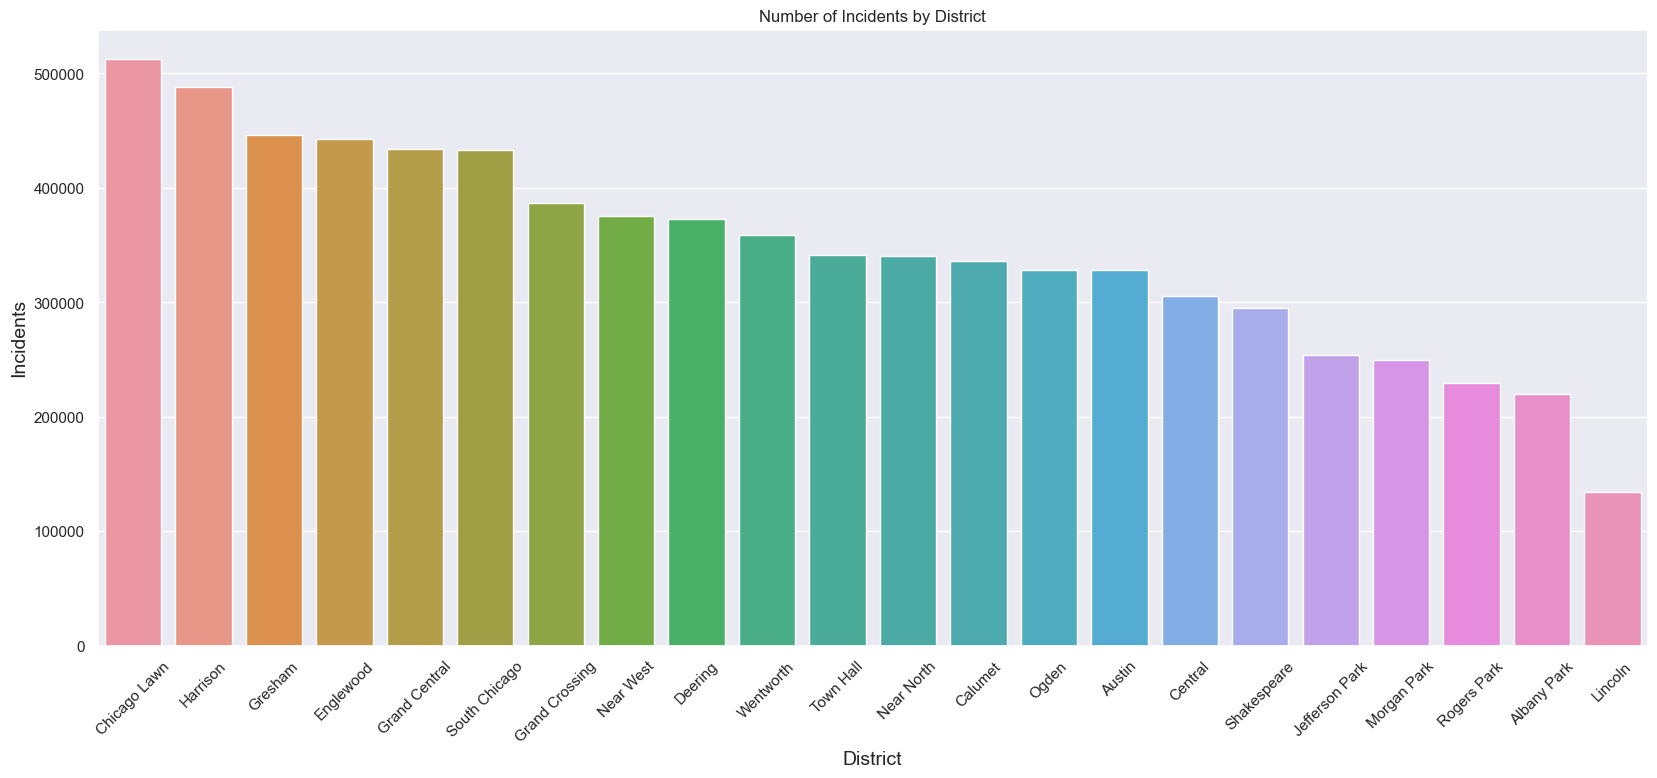

In [80]:
DistrictIncidents = df_dist.groupby(['dist_name'])['dist_name'].count()
DistrictIncidents = DistrictIncidents.sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=DistrictIncidents.index, y=DistrictIncidents.values)
plt.tick_params(axis='x', rotation=45)
plt.title('Number of Incidents by District')
plt.ylabel('Incidents', fontsize=14)
plt.xlabel('District', fontsize=14)
plt.show()

#### Ratio of Arrests by Police Districts

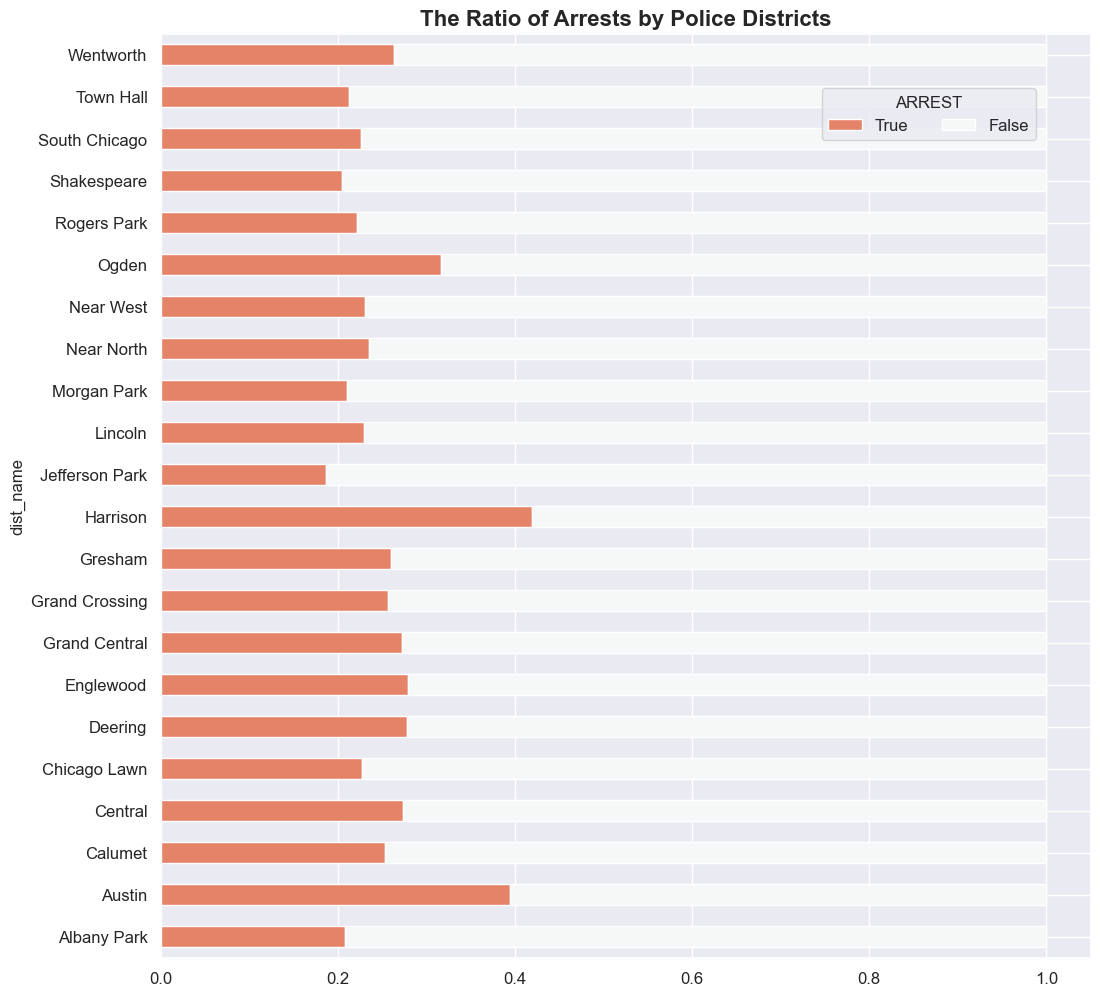

In [81]:
colors = sns.color_palette("RdBu", n_colors=3)

#Group by police district and arrest
df_dist_by_arrest = df_dist.copy()
df_dist_by_arrest = df_dist_by_arrest.groupby(['dist_name', 'Arrest']).size().reset_index(name='No. of Crimes')

#Create pivot table 

pivot_by_arrest = pd.pivot_table(df_dist_by_arrest, index=['dist_name'], columns = ['Arrest'], values= 'No. of Crimes', aggfunc=np.sum)

pivot_by_arrest = pivot_by_arrest.reset_index()
#pivot_by_arrest.disply()

#Create new columns in pivot table - 'Total No.', 'True', 'False'
pivot_by_arrest['Total No.']=pivot_by_arrest[True] + pivot_by_arrest[False]
pivot_by_arrest['True']=pivot_by_arrest[True]/ pivot_by_arrest['Total No.']
pivot_by_arrest['False']=pivot_by_arrest[False]/ pivot_by_arrest['Total No.']
pivot_by_arrest = pivot_by_arrest[['dist_name','True','False']]
pivot_by_arrest = pivot_by_arrest.set_index('dist_name')

#Plot stacked bar chart of Arrest success for the top 10 crimes
pivot_by_arrest.plot(kind='barh', color = colors, stacked=True, figsize = (12, 12))
plt.title('The Ratio of Arrests by Police Districts',fontsize=16,fontweight='bold')
plt.ylabel('dist_name')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(0.95, 0.95), ncol=2, title = 'ARREST')



<div class="alert alert-block alert-info">

This analysis clearly tells us that crimes involving “Weapons Violation” & “Concealed Carry License Violation” have a high arrest count. However, for the other crime types, the Chicago police department might want to look into better ways of tackling investigations. 
</div>


#### The HeatMap of Crimes For Curent  2022 Year

In [ ]:
import folium

# Required for creating the heatmap of crimes
from folium import plugins

map_df = updated_df[(updated_df['Year']==2022)]

crime_location = list(zip(map_df.Latitude, map_df.Longitude))

#generate map
base_map = folium.Map(location=[41.5, -87.75], zoom_start=8, control_scale=True)
heatmap = plugins.HeatMap(crime_location, radius=8, blur=5)       
base_map.add_child(heatmap)


<div class="alert alert-block alert-success">
<b>Insights</b>

    
1. Notable crime rate is higher during the July and August.
A trend we see across our analysis shows that crime rates spike from July – August during the summer period. This can be  because during winter it is really cold in Chicago and people usually don't go out much whereas in summer time they go out for enjoying or exploring.

2. Theft is the mostly populated crime in Chicago and it happens during day time. 
Crime might spike at this as most of the people leave their homes unattended and theft, bulgary and robbery happens at that time.
    <b>From the above to analysis, it is recommended to have a good theft protection system in house as Theft is most prominent crime and it happens during day and in summer months when people are not at home. Therefore, a better protection systme can help us reduce this crime category.</b>
   
3. Gun related incidents are frequently reported with high arrest rates
From our analysis, we can see that assault and robbery with handguns are the most highly reported incidents in Chicago. This is also coupled with the fact that gun violence is more likely to lead to fatality and people are more inclined to report gun violence as compared to theft or battery. 

4. Eveidently, the overall percentage of crime is falling, but on the individual analysis we found that major crime categories are rising in last 3-4 years. Therefore, a kneen measures should be taken by the police to control each and every crime type.

5. Mostly Assault is reported during the day hours, this means people are not safe in day hours in comparison to night hours. The police must increase their protection during the day to prevent Assault happenings with the people.

</div>

